In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
pd.options.display.max_rows = 999
%matplotlib inline

### Load Alex data set

In [2]:
df_alex = pd.read_excel('RBC and asexual Pf lipidome.xlsx', skiprows=1)

In [3]:
df_alex

,Unnamed: 0,RBC1,RBC2,RBC3,Ring 1,Ring 2,Ring 3,Trophozoite 1,Trophozoite 2,Trophozoite 3,Schizont 1,Schizont 2,Schizont 3
0,CE 16:0,7.580000,8.470000,7.040000,3.940000,3.250000,6.760000,8.800000,2.060000,12.860000,3.530000,4.530000,6.440000
1,CE 16:1,2.300000,4.900000,2.110000,0.000000,0.000000,3.190000,0.000000,0.000000,4.530000,0.000000,0.000000,0.000000
2,CE 18:1,9.940000,14.400000,8.710000,3.570000,1.930000,6.690000,0.000000,0.000000,17.090000,0.000000,0.000000,0.000000
3,CE 18:2,27.430000,53.540000,27.970000,11.400000,3.100000,20.640000,0.000000,0.000000,52.560000,0.000000,0.000000,0.000000
4,CE 18:3,3.980000,8.980000,4.140000,1.040000,0.000000,3.210000,0.000000,0.000000,8.570000,0.000000,0.000000,0.000000
5,CE 20:4,3.750000,8.320000,3.030000,1.740000,0.000000,2.720000,0.000000,0.000000,7.290000,0.000000,0.000000,0.000000
6,CE 20:5,0.000000,0.000000,1.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,DAG (32:0) 16:0_16:0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.866667,17.060000,18.460000,28.830000,38.810000,43.800000
8,DAG (34:0) 16:0_18:0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.970000,12.900000,22.550000,11.020000,0.000000
9,DAG (34:1) 16:0_18:1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.240000,40.160000,138.650000,150.350000,83.360000


### Remove rows with only 'NaN' value

In [4]:
df_alex.dropna(axis=0, how='all', inplace=True)
df_alex.reset_index(drop=True, inplace=True)

lst = df_alex.iloc[:,0]
index_classes = [0]
head_group_nme = []
# Find all different lipid groups in file
for i,x in enumerate(lst):
    if i == len(lst)-1:
        break
    if x[:2] != lst[i+1][:2]:
        index_classes.append(i+1)
        if i < 128:
            head_group_nme.append(x.split(' ')[0])
        print(i, x)
# print(index_classes)

6 CE 20:5
11 DAG (36:2) 18:1_18:1
12 FreeChol
14 LPC 18:0
40 PC O-38:5
53 PE 40:6
59 PG (36:3) 18:1_18:2
66 PS 40:6
77 TAG 56:6
84 Cer 24:2
92 DHSM 25:0
117 SM 26:2
118 Cer
119 DHSM
120 SM
121 CE
122 DG
123 FC
124 PC
125 PE
126 PG
127 PS
128 TG
129 Neutral lipids
130 Phospholipids
131 Free cholesterol
132 Sphingolipids
133 total
137 % Sphingolipids
138 Phospholipids (total)
142 % PS
143 Neutral lipids (total)
146 % TAG
147 Sphingolipids (total)


In [5]:
df_alex.set_index('Unnamed: 0', inplace=True)
df_sns = df_alex.copy()

Calcuate mean and std. for each metabolite in each phase mean = mean(Ring1,Ring2,Ring3) 

in addtion produce dict with key = metaboliteID, value as nested list each entry for a phase = [[Ring_phase],[Tropho_Phase],[Schizont_Phase]]

In [6]:
# get each metabolite in every phase
dic = {}
nrow = 134
for i in range(4):
    phase = df_alex.columns[i*3][:-1]
    print(phase)
    data = df_alex.iloc[:,i*3:i*3+3].T
    df_alex['mean_'+phase] = df_alex.iloc[:nrow,i*3:i*3+3].mean(axis=1)
    df_alex['std_'+phase] = df_alex.iloc[:nrow,i*3:i*3+3].std(axis=1)
    df_alex['coeff_var'+phase] = df_alex['std_'+phase] / df_alex['mean_'+phase]
    for i,x in enumerate(data.columns):
        y = data[x]
        dic[x] = dic.get(x, [])
        if x in dic.keys():
            dic[x].append(data[x])
        

RBC
Ring 
Trophozoite 
Schizont 


In [34]:
df_alex

,RBC1,RBC2,RBC3,Ring 1,Ring 2,Ring 3,Trophozoite 1,Trophozoite 2,Trophozoite 3,Schizont 1,...,coeff_varRBC,mean_Ring,std_Ring,coeff_varRing,mean_Trophozoite,std_Trophozoite,coeff_varTrophozoite,mean_Schizont,std_Schizont,coeff_varSchizont
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
CE 16:0,7.580000,8.470000,7.040000,3.940000,3.250000,6.760000,8.800000,2.060000,12.860000,3.530000,...,0.093820,4.650000,1.859597,0.399913,7.906667,5.455138,0.689942,4.833333,1.478524,0.305902
CE 16:1,2.300000,4.900000,2.110000,0.000000,0.000000,3.190000,0.000000,0.000000,4.530000,0.000000,...,0.502317,1.063333,1.841747,1.732051,1.510000,2.615397,1.732051,0.000000,0.000000,NaN
CE 18:1,9.940000,14.400000,8.710000,3.570000,1.930000,6.690000,0.000000,0.000000,17.090000,0.000000,...,0.271761,4.063333,2.418043,0.595089,5.696667,9.866916,1.732051,0.000000,0.000000,NaN
CE 18:2,27.430000,53.540000,27.970000,11.400000,3.100000,20.640000,0.000000,0.000000,52.560000,0.000000,...,0.410901,11.713333,8.774197,0.749078,17.520000,30.345530,1.732051,0.000000,0.000000,NaN
CE 18:3,3.980000,8.980000,4.140000,1.040000,0.000000,3.210000,0.000000,0.000000,8.570000,0.000000,...,0.498542,1.416667,1.637814,1.156104,2.856667,4.947892,1.732051,0.000000,0.000000,NaN
CE 20:4,3.750000,8.320000,3.030000,1.740000,0.000000,2.720000,0.000000,0.000000,7.290000,0.000000,...,0.570003,1.486667,1.377582,0.926625,2.430000,4.208883,1.732051,0.000000,0.000000,NaN
CE 20:5,0.000000,0.000000,1.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.732051,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
DAG (32:0) 16:0_16:0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.866667,17.060000,18.460000,28.830000,...,NaN,0.000000,0.000000,NaN,27.795556,17.396181,0.625862,37.146667,7.622351,0.205196
DAG (34:0) 16:0_18:0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.970000,12.900000,22.550000,...,NaN,0.000000,0.000000,NaN,10.623333,9.687757,0.911932,11.190000,11.275961,1.007682


In [13]:
dic.keys()

dict_keys(['CE 16:0', 'CE 16:1', 'CE 18:1', 'CE 18:2', 'CE 18:3', 'CE 20:4', 'CE 20:5', 'DAG (32:0) 16:0_16:0', 'DAG (34:0) 16:0_18:0', 'DAG (34:1) 16:0_18:1', 'DAG (36:1) 18:0_18:1', 'DAG (36:2) 18:1_18:1', 'FreeChol', 'LPC 16:0', 'LPC 18:0', 'PC 32:0', 'PC 32:1', 'PC 34:0', 'PC 34:1', 'PC 34:2', 'PC 34:3', 'PC 36:0', 'PC 36:1', 'PC 36:2', 'PC 36:3', 'PC 36:4', 'PC 36:5', 'PC 38:3', 'PC 38:4', 'PC 38:5', 'PC 38:6', 'PC 38:7', 'PC 40:4', 'PC 40:5', 'PC 40:6', 'PC 40:7', 'PC O-32:0', 'PC O-34:1', 'PC O-36:2', 'PC O-38:4', 'PC O-38:5', 'PE 34:1', 'PE 34:2', 'PE 36:1', 'PE 36:2', 'PE 36:3', 'PE 36:4', 'PE 36:5', 'PE 38:3', 'PE 38:4', 'PE 38:5', 'PE 38:6', 'PE 40:5', 'PE 40:6', 'PG (34:1) 16:0_18:1', 'PG (34:2) 16:0_18:2', 'PG (36:1) 18:0_18:1', 'PG (36:2) 18:0_18:2', 'PG (36:2) 18:1_18:1', 'PG (36:3) 18:1_18:2', 'PS 34:1', 'PS 36:1', 'PS 36:2', 'PS 38:4', 'PS 38:5', 'PS 40:5', 'PS 40:6', 'TAG 48:0', 'TAG 50:0', 'TAG 50:1', 'TAG 50:2', 'TAG 52:1', 'TAG 52:2', 'TAG 52:3', 'TAG 54:2', 'TAG 5

Produce boxplots of every metabolite with box = values at specific phase, plus scatterplot of the values to see spreading

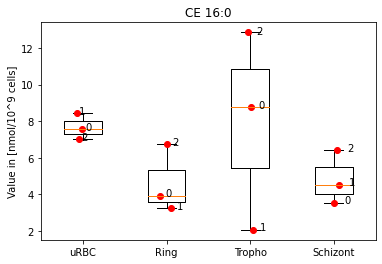

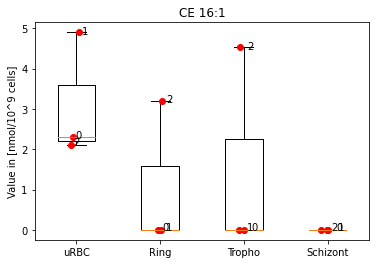

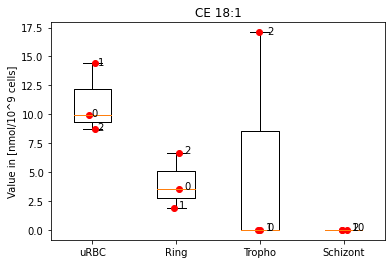

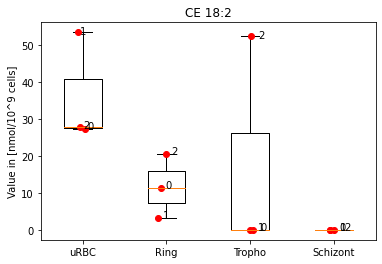

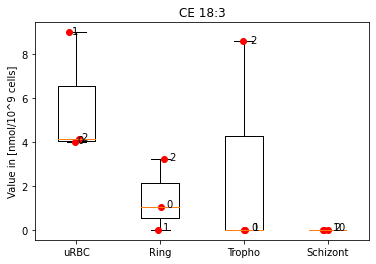

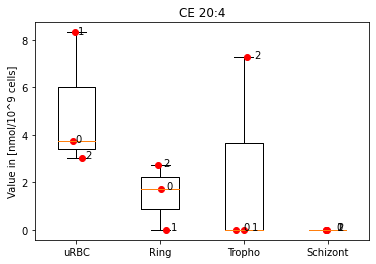

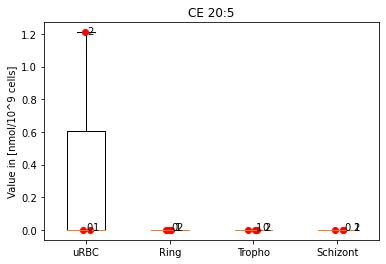

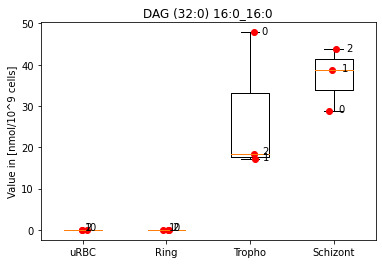

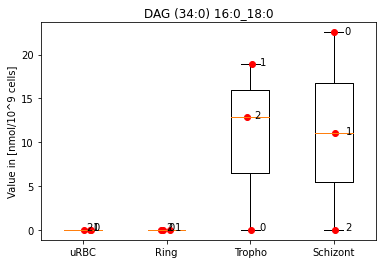

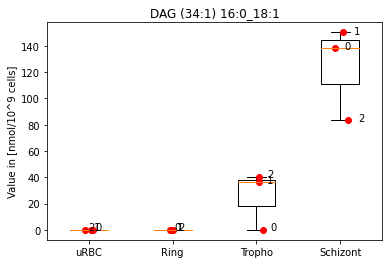

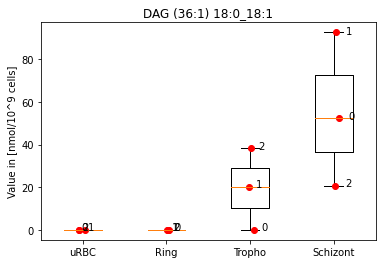

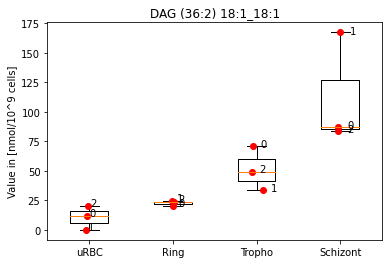

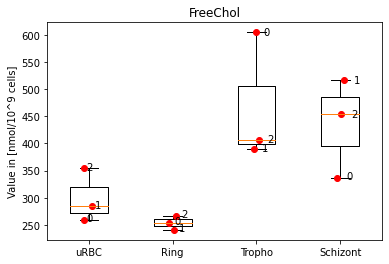

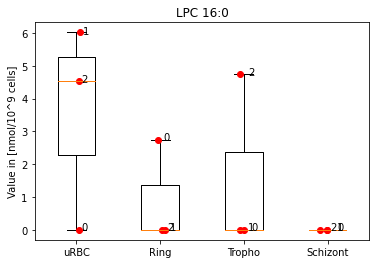

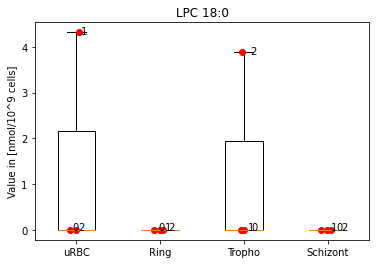

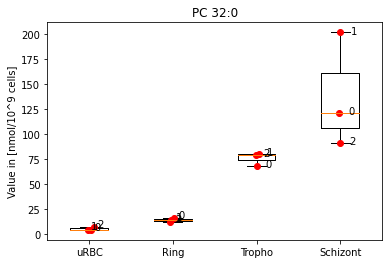

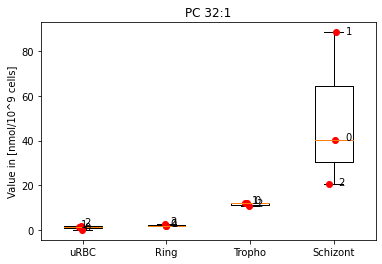

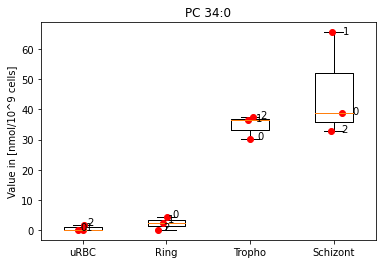

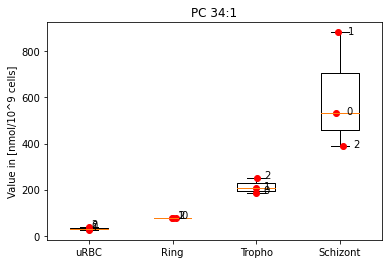

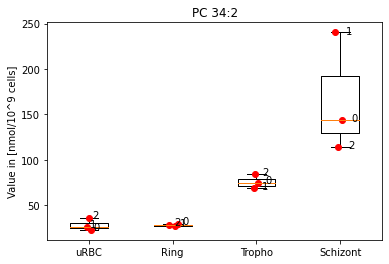

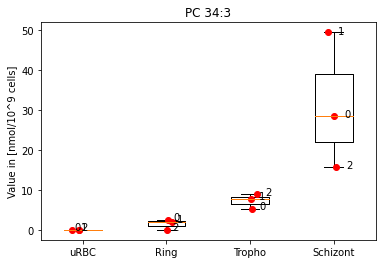

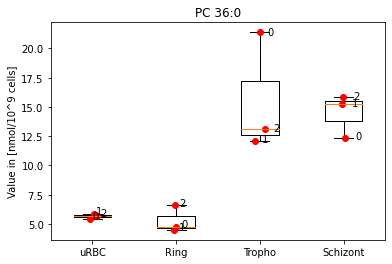

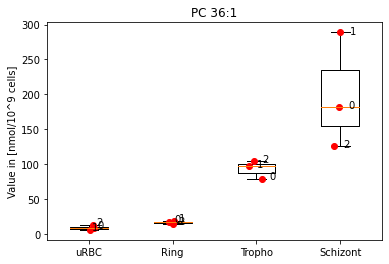

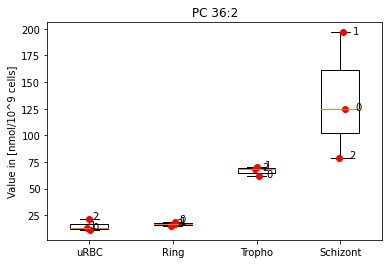

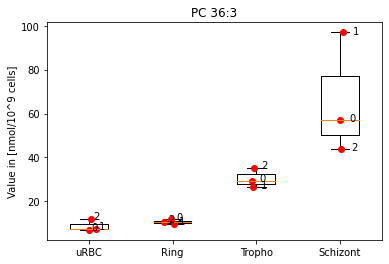

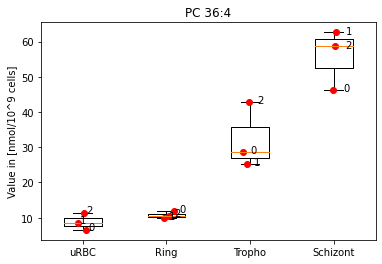

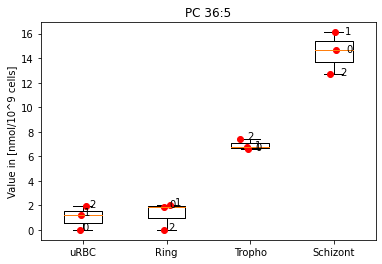

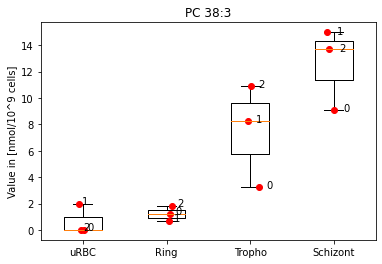

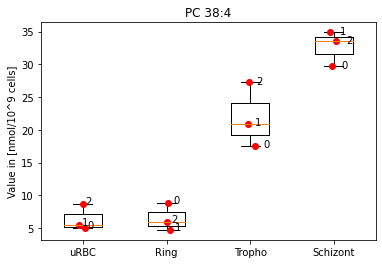

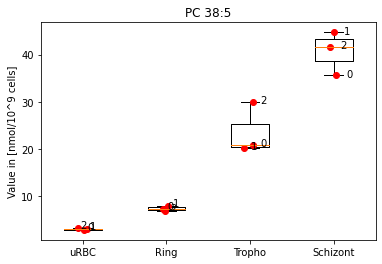

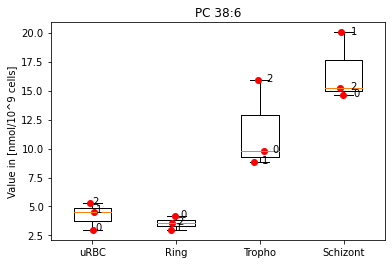

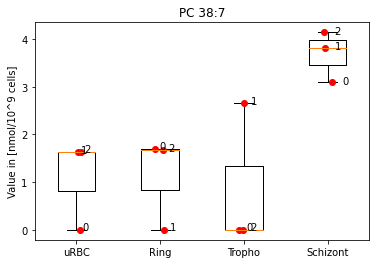

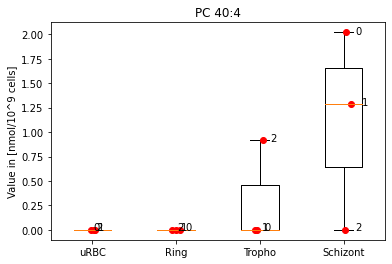

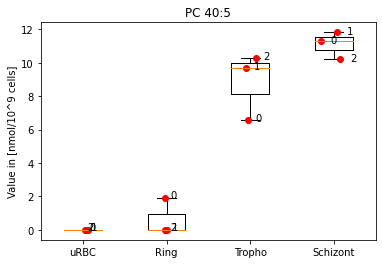

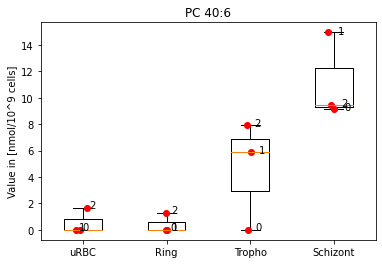

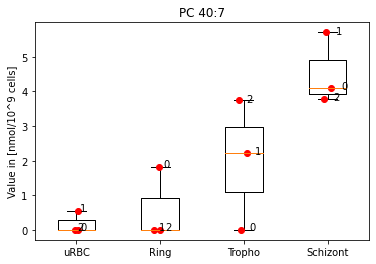

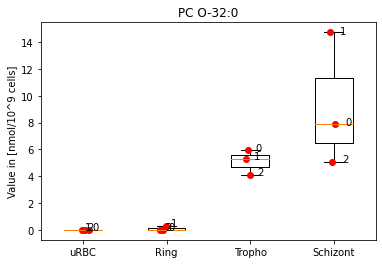

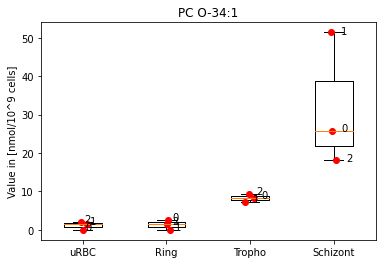

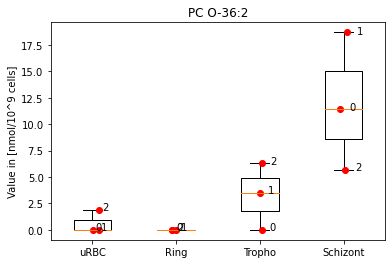

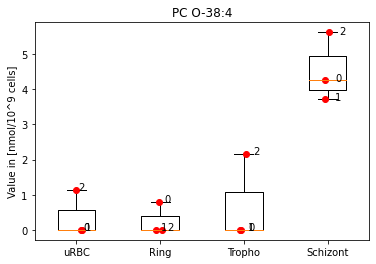

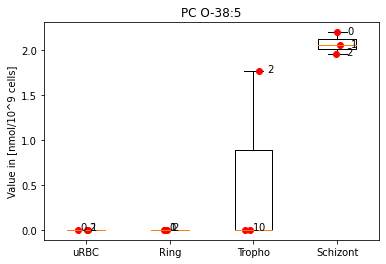

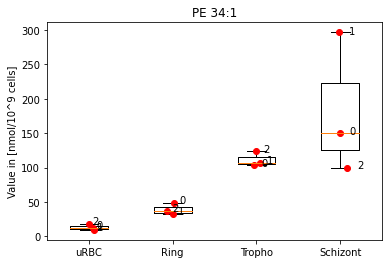

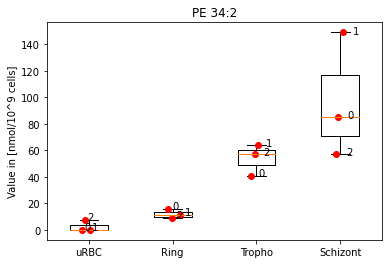

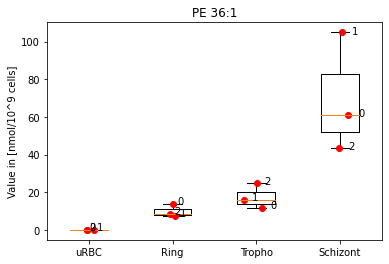

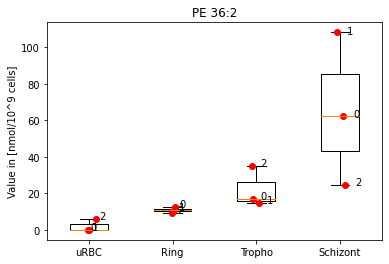

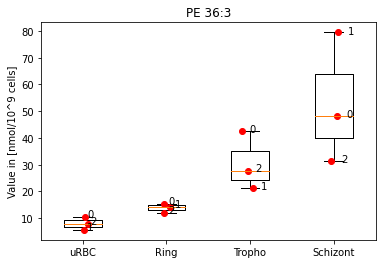

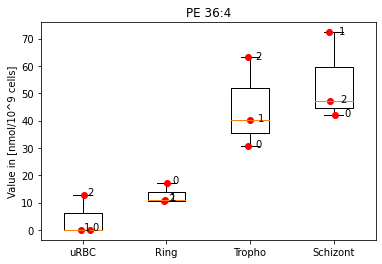

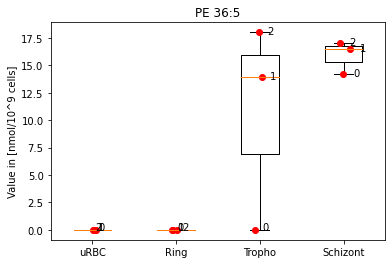

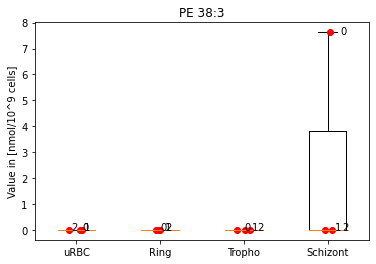

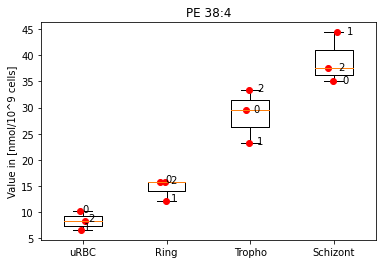

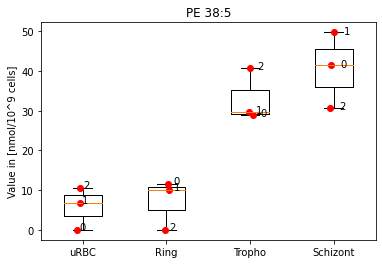

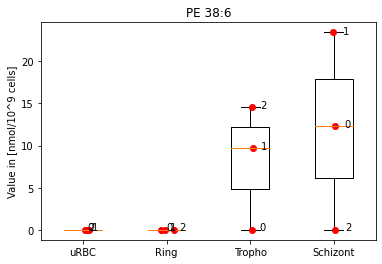

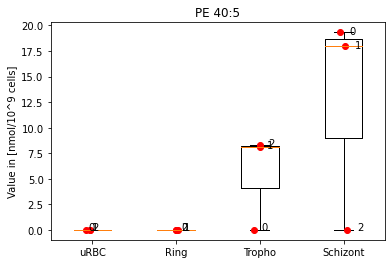

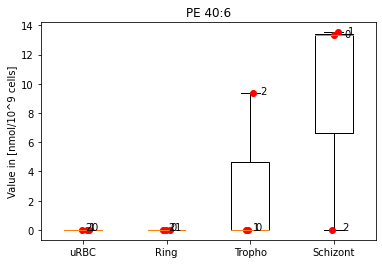

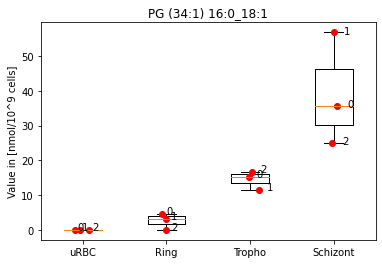

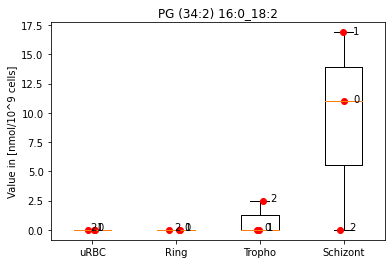

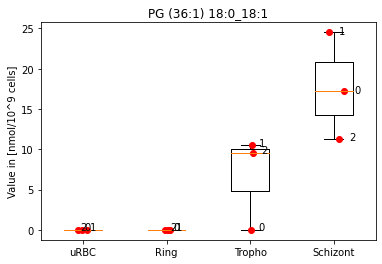

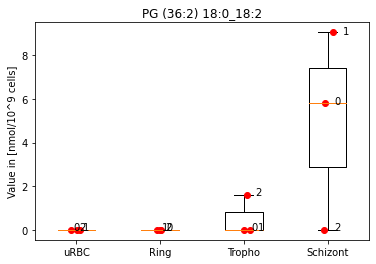

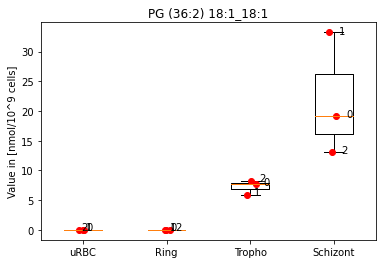

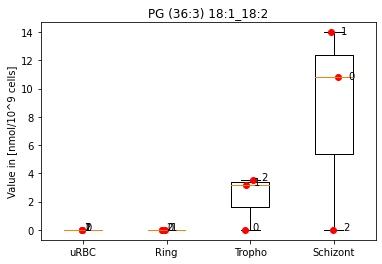

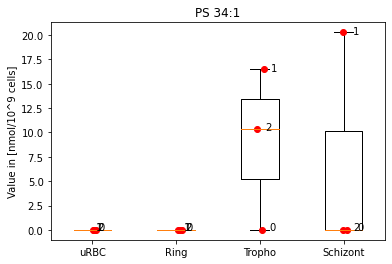

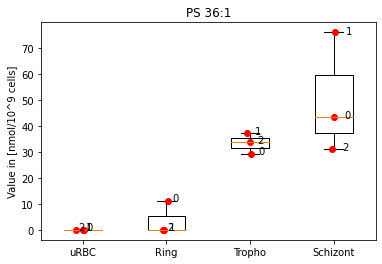

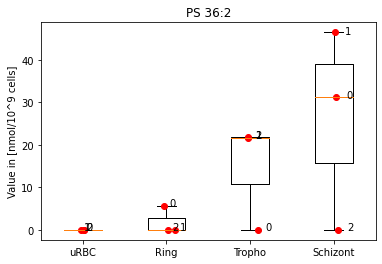

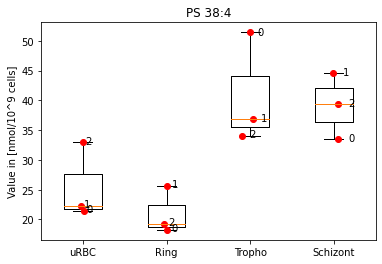

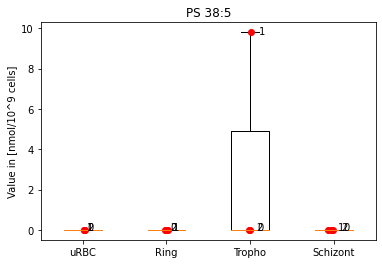

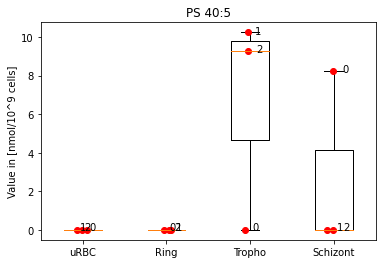

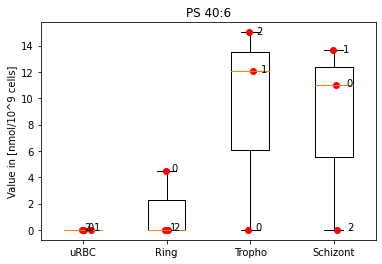

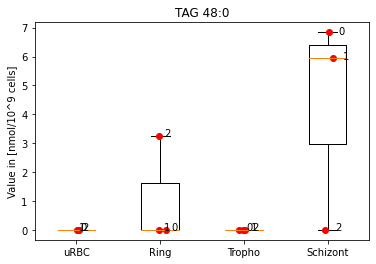

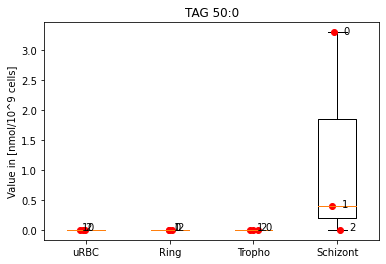

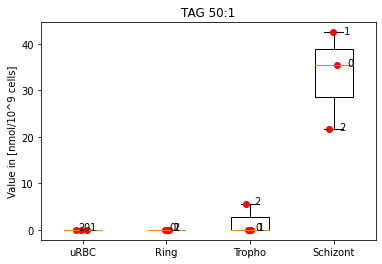

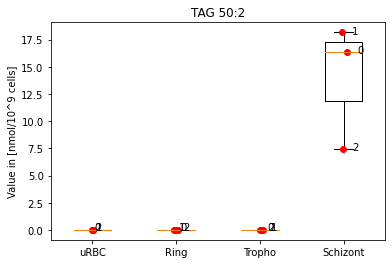

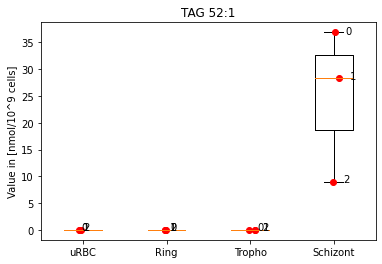

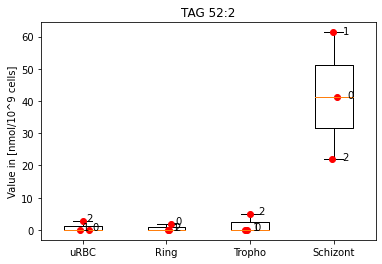

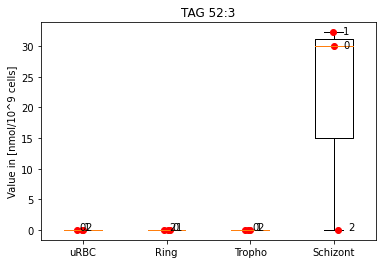

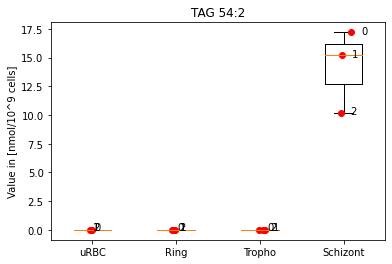

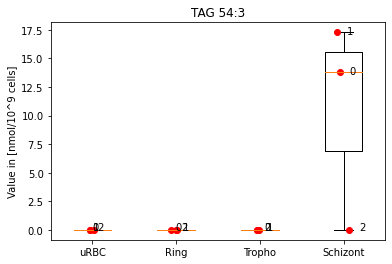

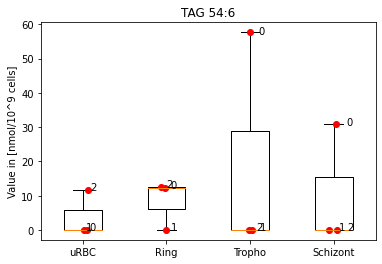

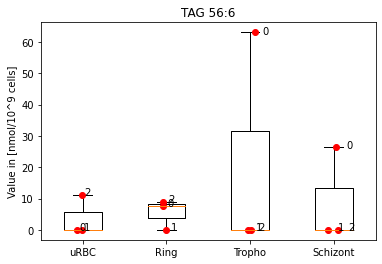

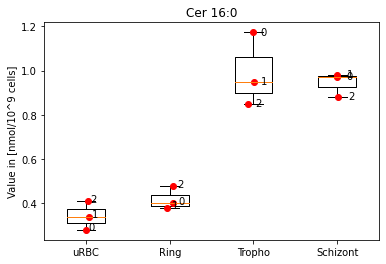

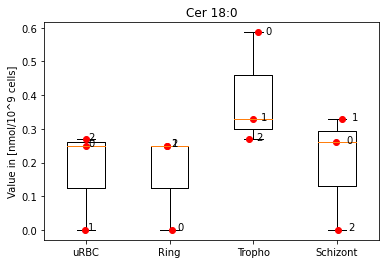

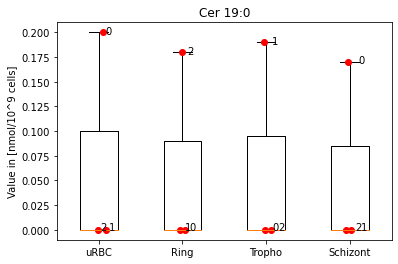

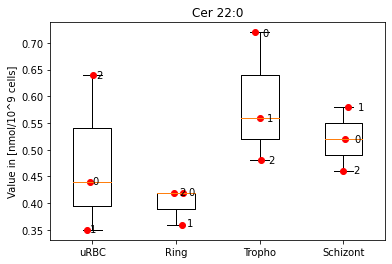

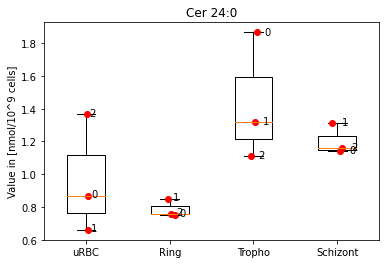

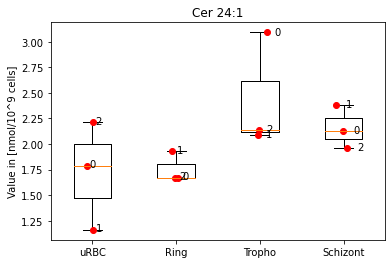

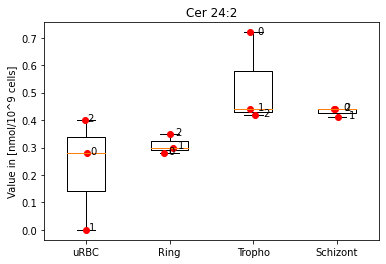

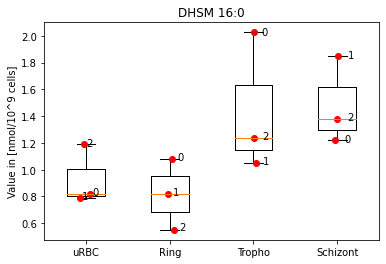

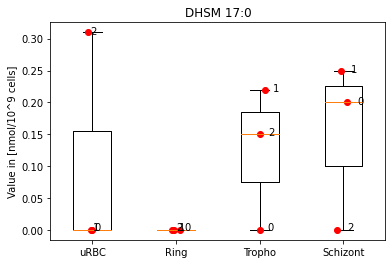

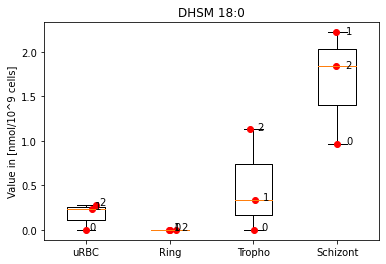

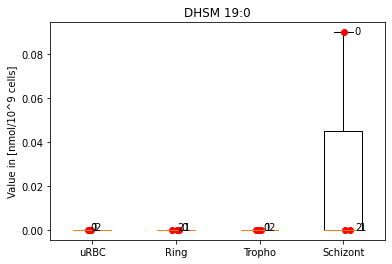

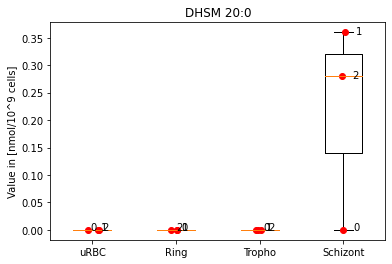

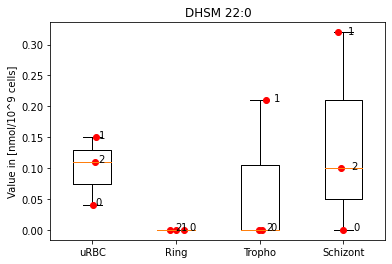

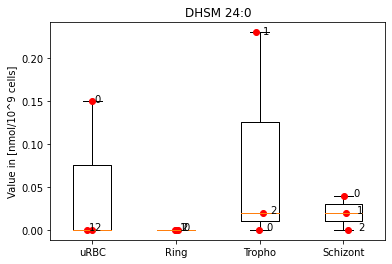

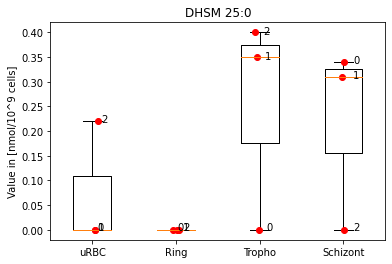

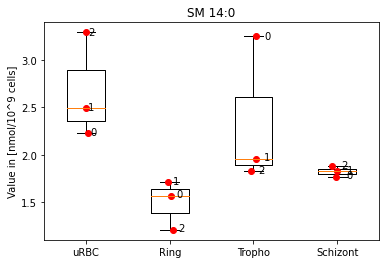

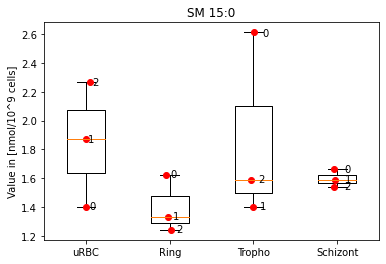

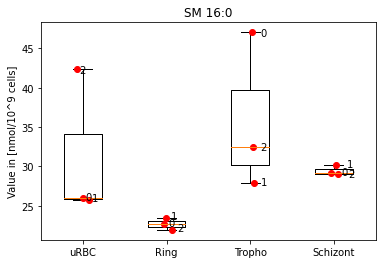

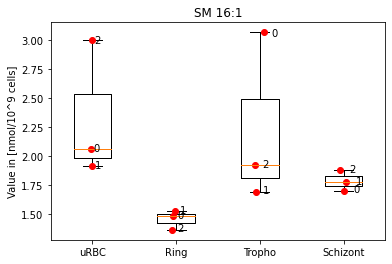

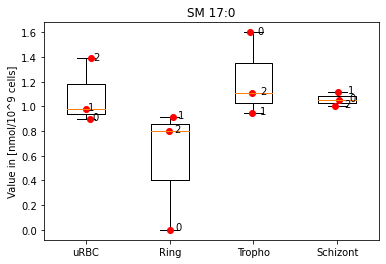

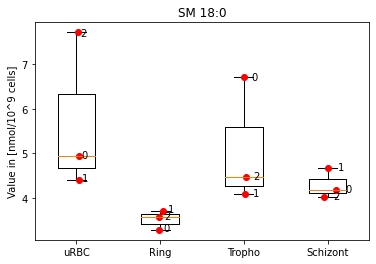

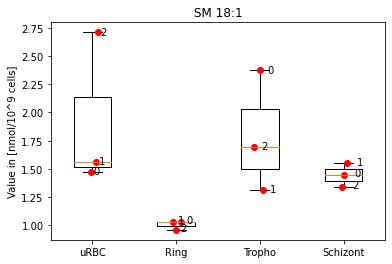

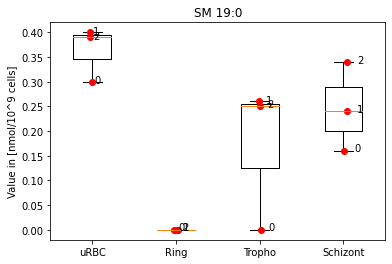

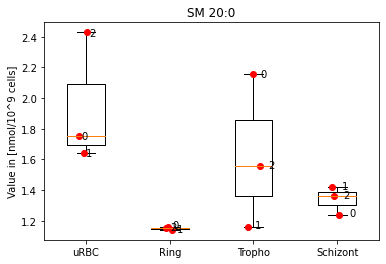

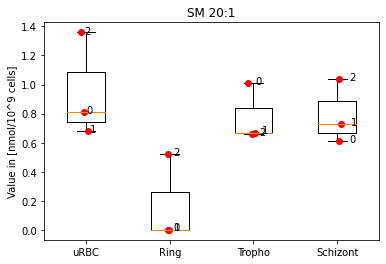

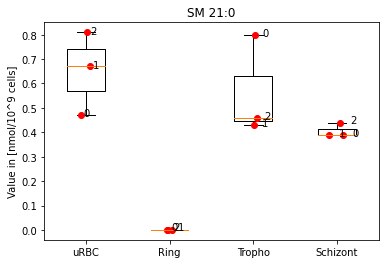

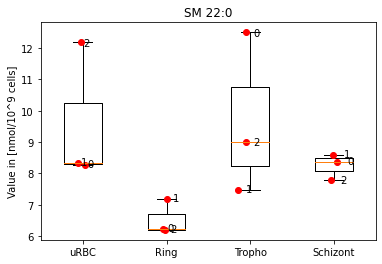

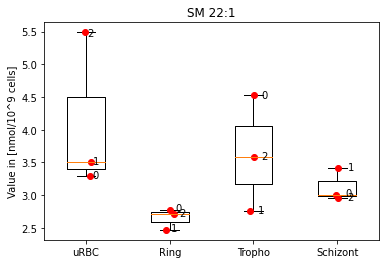

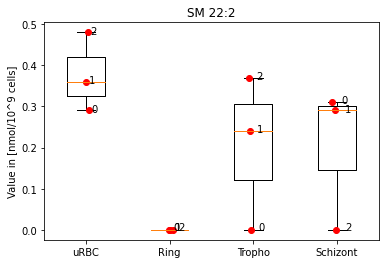

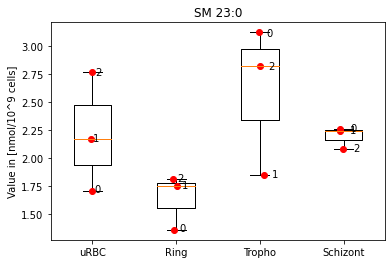

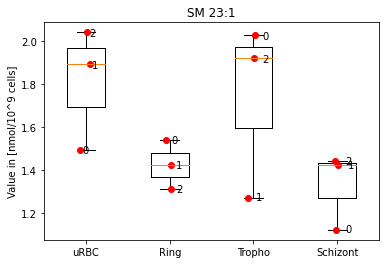

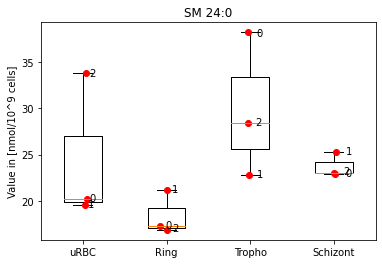

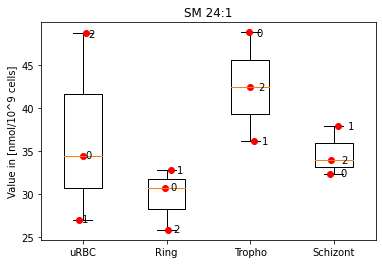

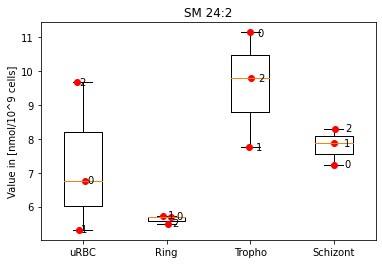

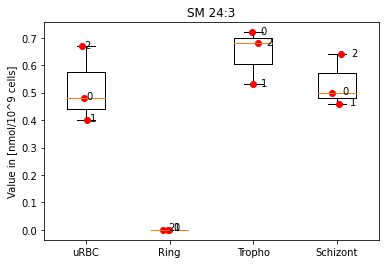

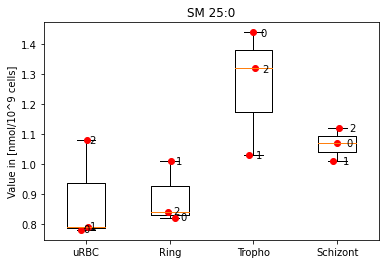

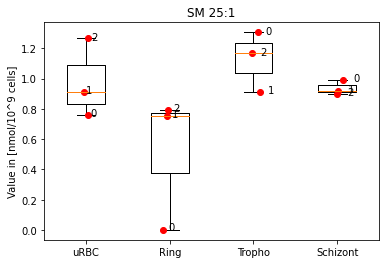

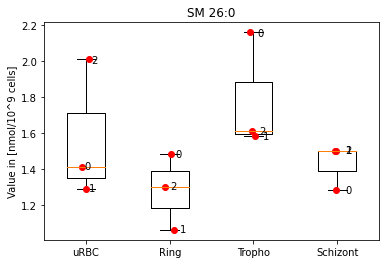

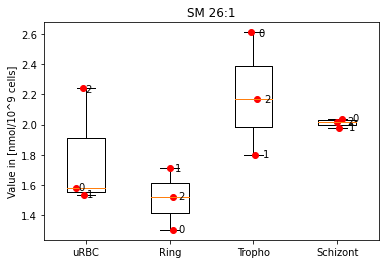

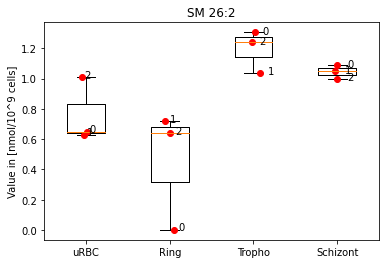

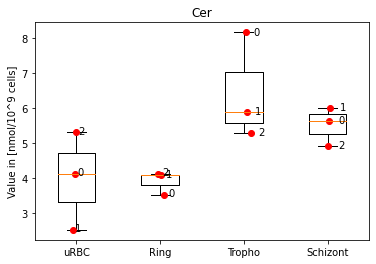

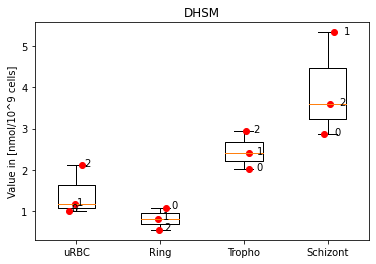

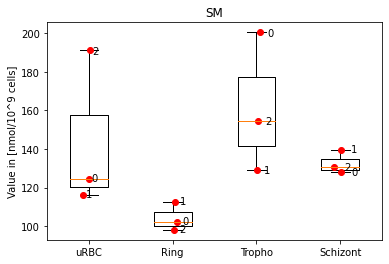

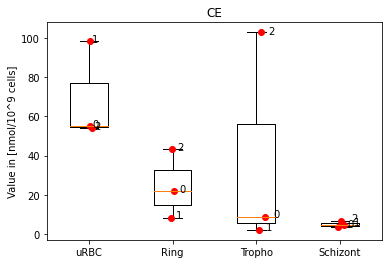

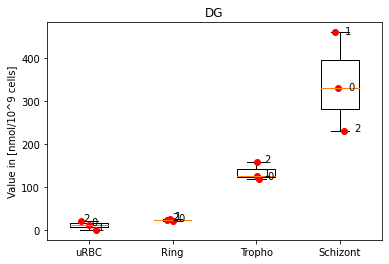

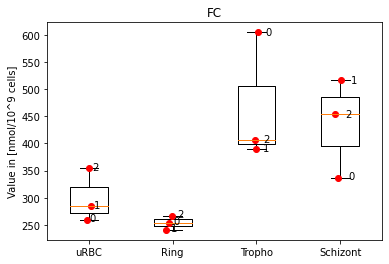

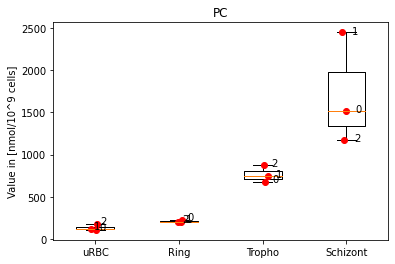

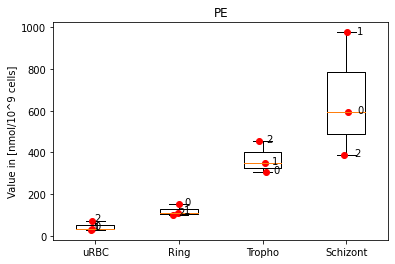

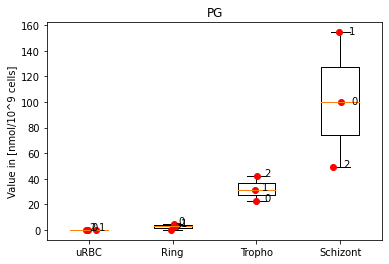

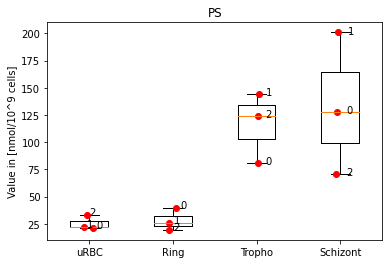

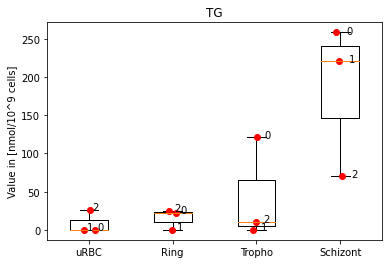

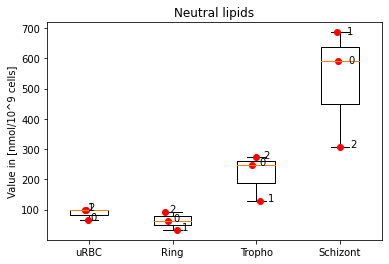

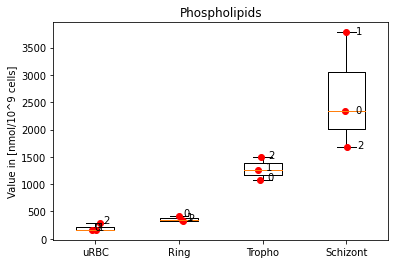

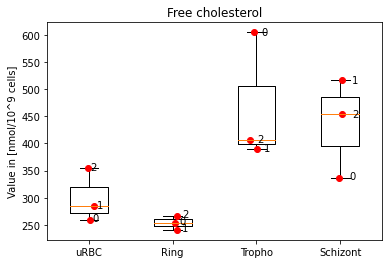

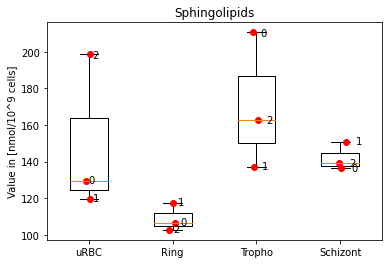

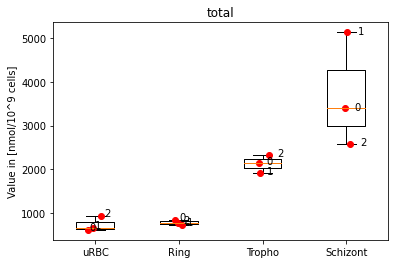

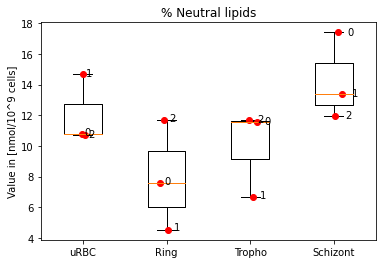

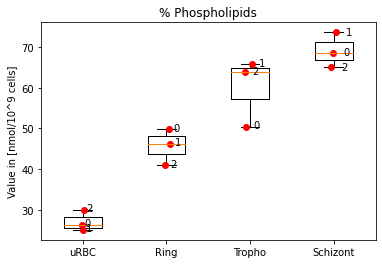

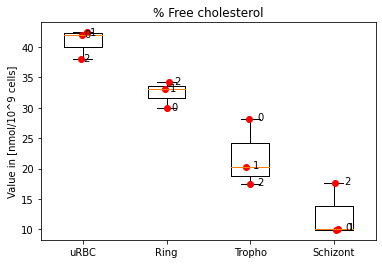

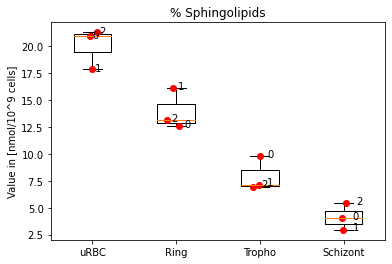

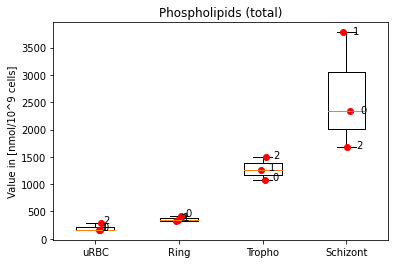

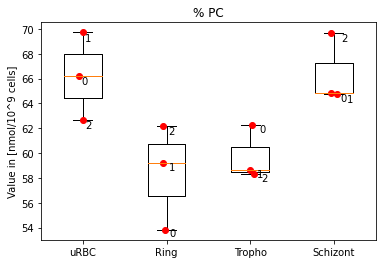

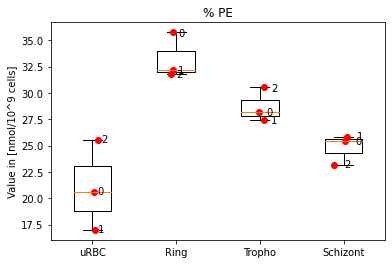

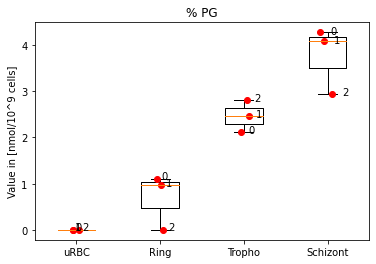

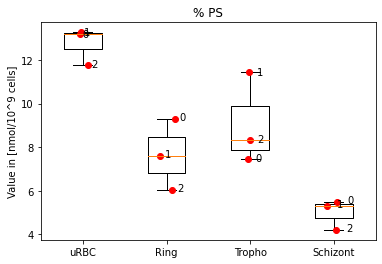

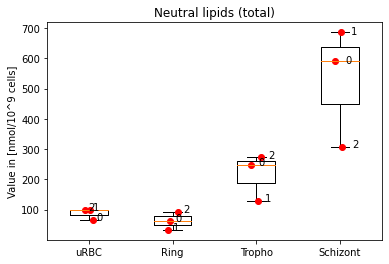

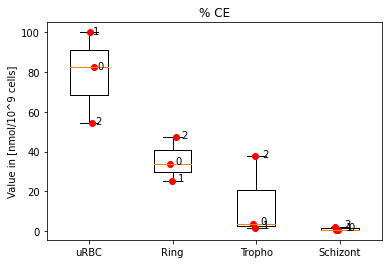

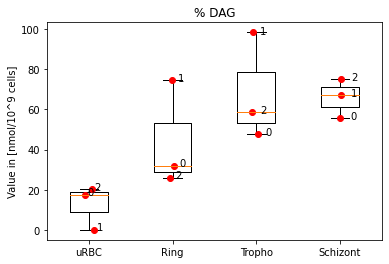

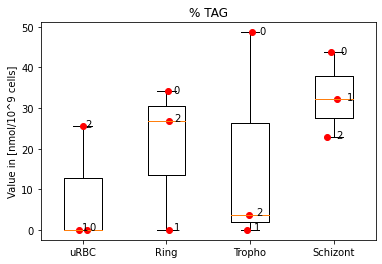

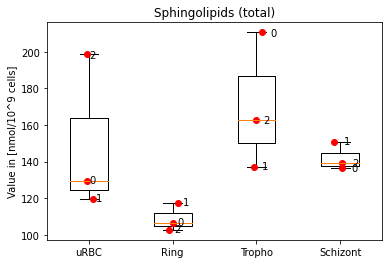

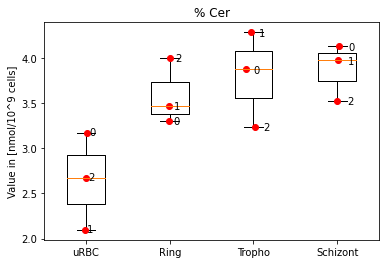

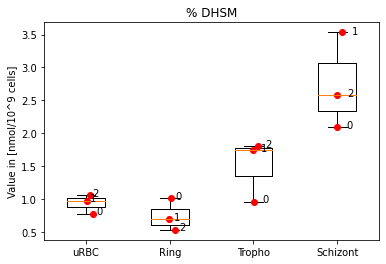

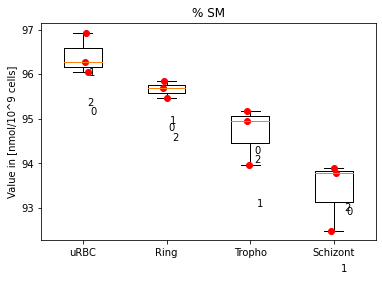

In [8]:
phases = ['uRBC','Ring','Tropho','Schizont']
fig, ax = plt.subplots()
for key in dic.keys():
    data = dic[key]
    #plot data of each metabolite values of each time point
    plt.boxplot(data)
    #make red dots and lable each data point
    for i in range(len(data)):
        y = data[i]
        # Add some random "jitter" to the x-axis
        x = np.random.normal(i+1, 0.04, size=len(y))
        _ = plt.plot(x, y, 'r.', alpha=1.0, markersize=12)
        
        for ids, txt in enumerate(y):
            _ = plt.text(x[ids]+0.03*x[ids], y[ids]-0.01*y[ids],ids)
        
    _ = plt.title(key)
    _ = plt.ylabel('Value in [nmol/10^9 cells]')
    _ = plt.xticks(np.arange(4)+1,('uRBC','Ring','Tropho','Schizont'))

    plt.show()
    plt.close()

Produce boxplot and scatter plot of every metabolite class in each phase

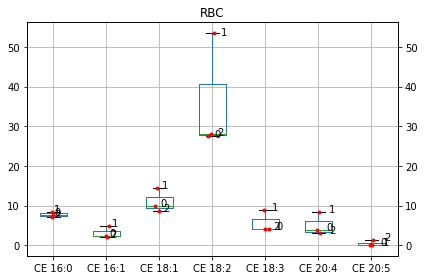

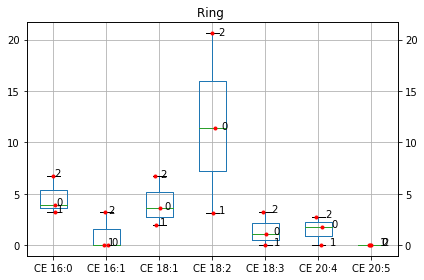

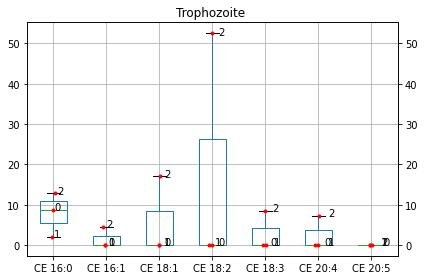

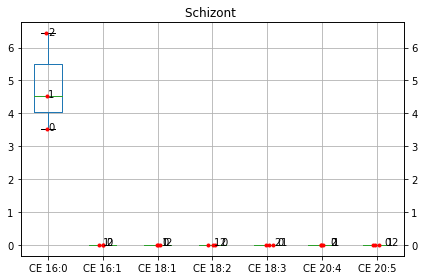

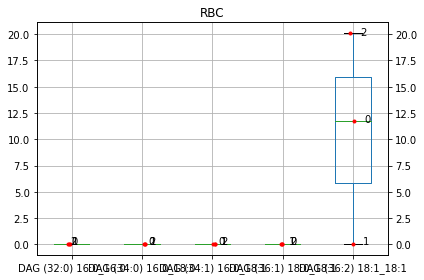

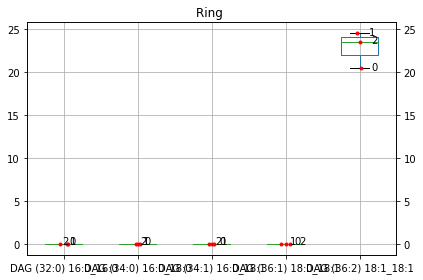

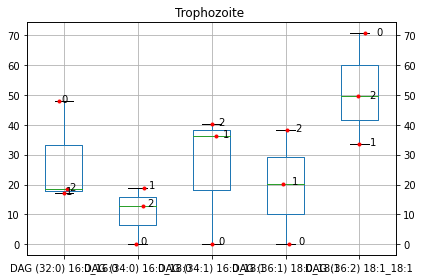

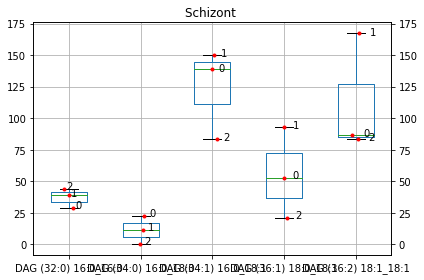

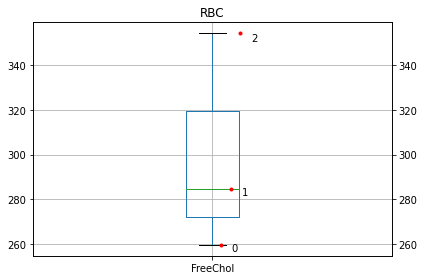

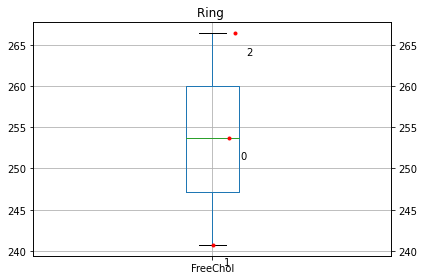

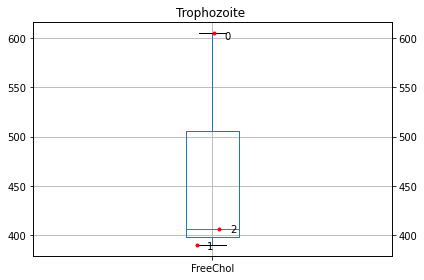

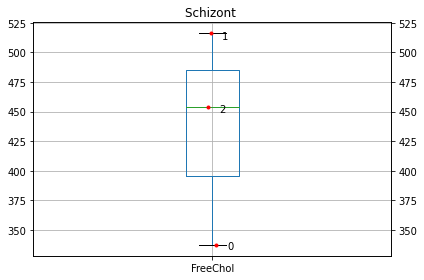

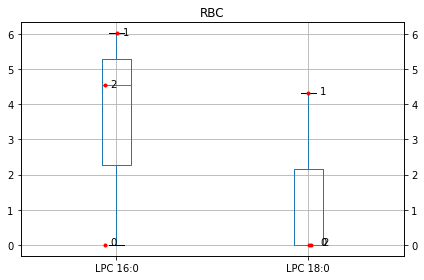

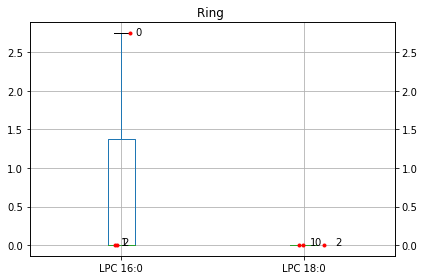

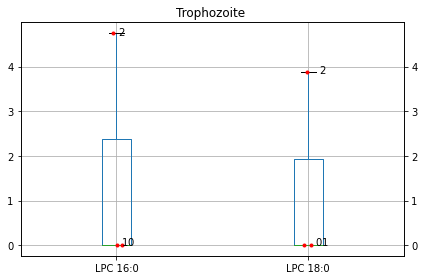

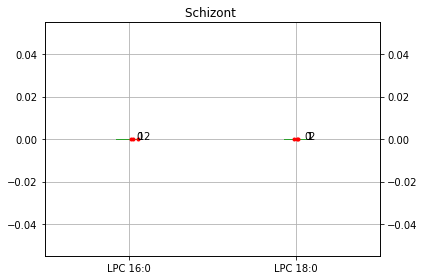

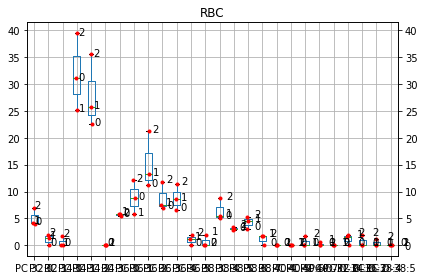

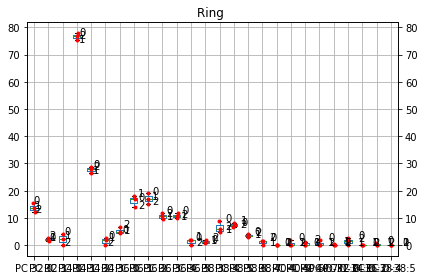

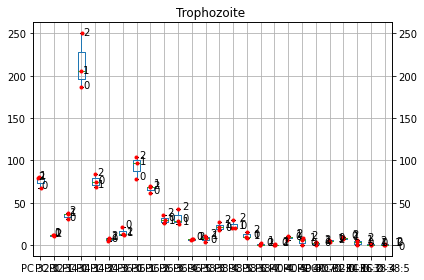

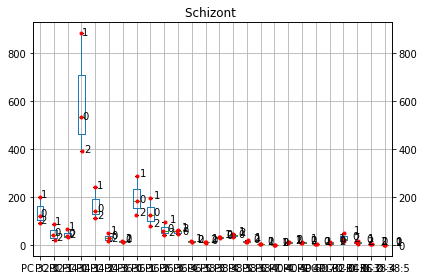

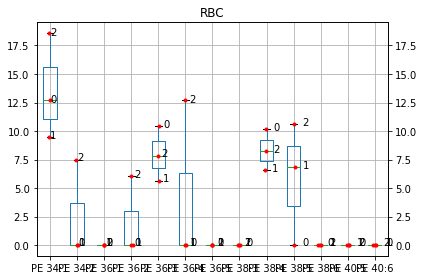

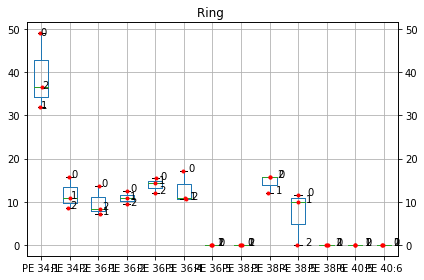

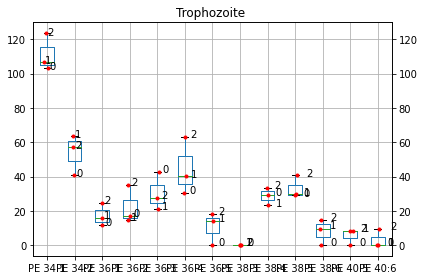

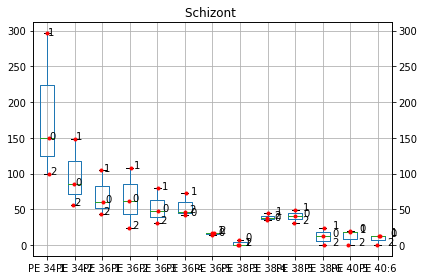

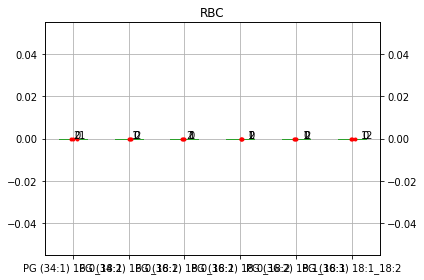

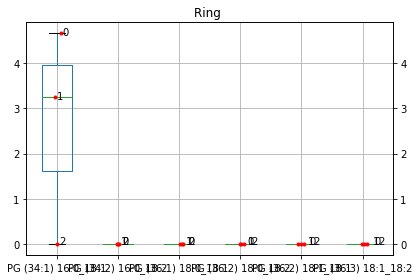

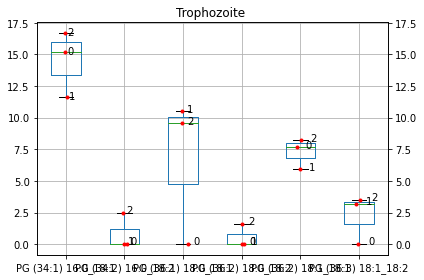

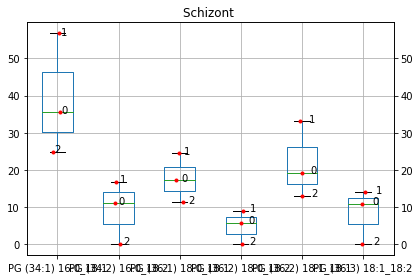

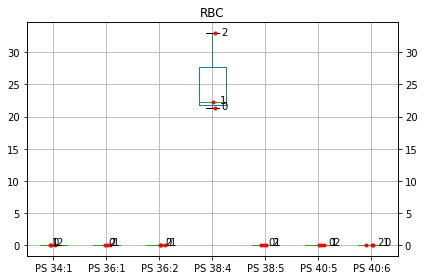

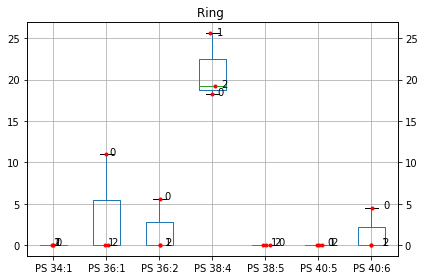

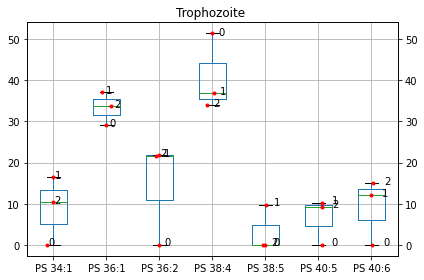

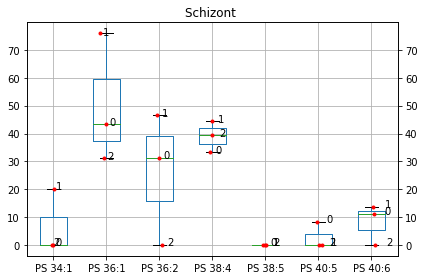

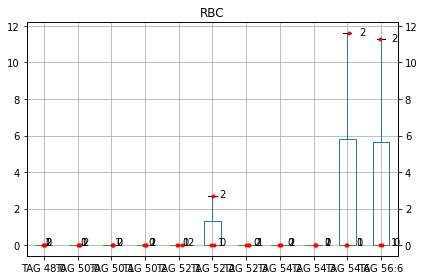

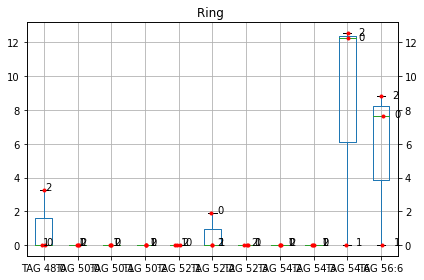

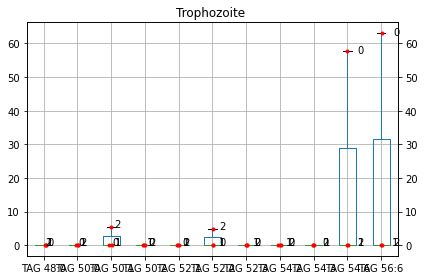

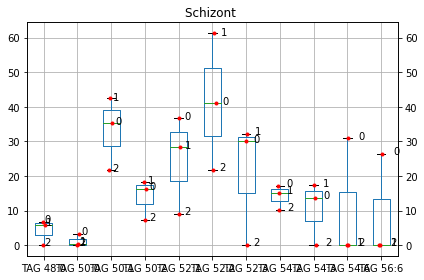

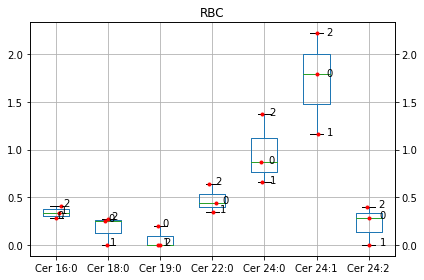

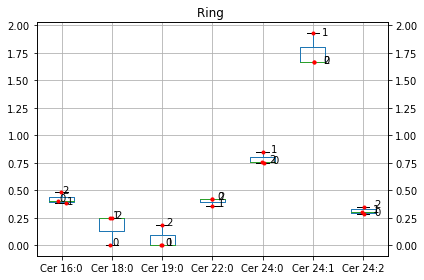

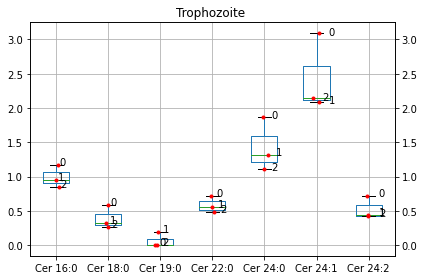

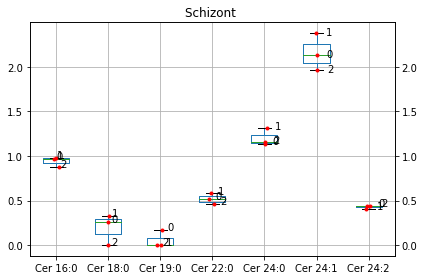

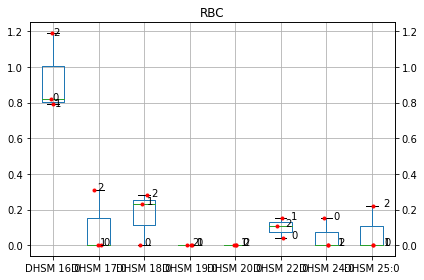

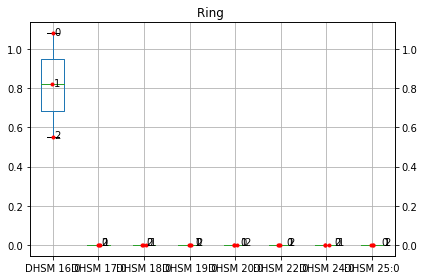

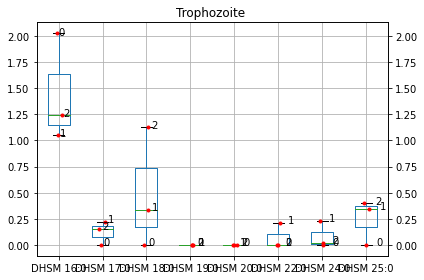

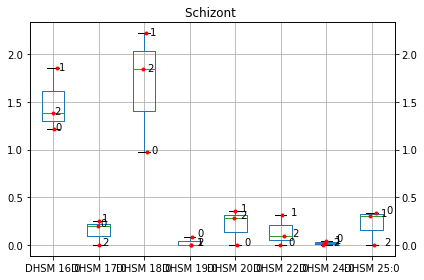

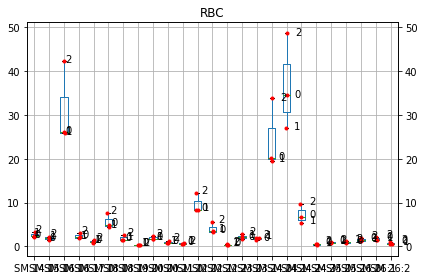

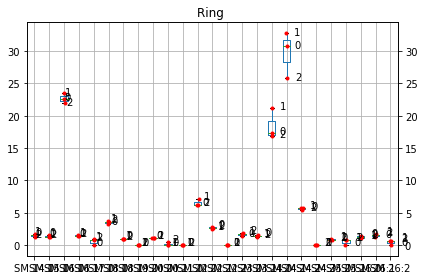

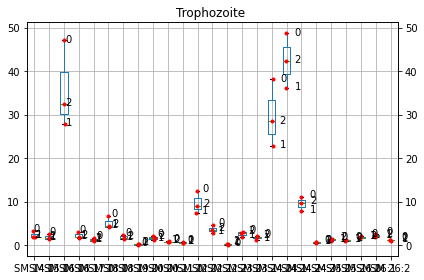

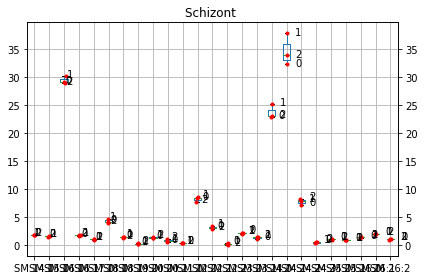

In [15]:
for step in range(len(index_classes)-1):
    if index_classes[step] == 118: 
        break
    df = df_alex.iloc[index_classes[step]:index_classes[step+1]].copy()
    # get each metabolite in class at every phase

    for i in range(4):
        phase = df.columns[i*3][:-1]
        data = df.iloc[:,i*3:i*3+3].T
        
        _ = data.boxplot()
        _ = plt.twinx()
        
        for i,x in enumerate(data.columns):
            y = data[x]
            # Add some random "jitter" to the x-axis
            x = np.random.normal(i+1, 0.04, size=len(y))
            _ = plt.plot(x, y, 'r.', alpha=1.0)
            
            for ids, txt in enumerate(y):
                _ = plt.text(x[ids]+0.03*x[ids], y[ids]-0.01*y[ids],ids)
        
        plt.xticks(rotation='vertical')
        plt.title(phase)
        plt.tight_layout()
        plt.show()
        plt.close()

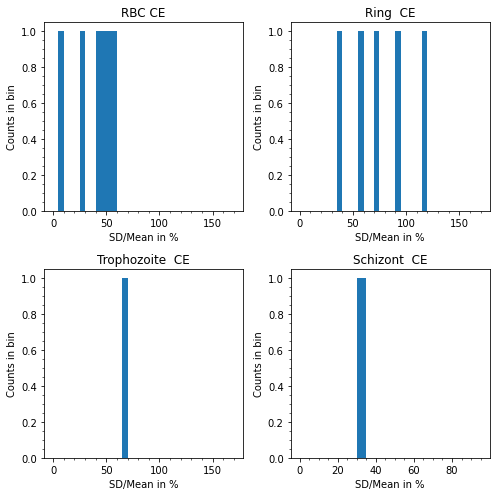

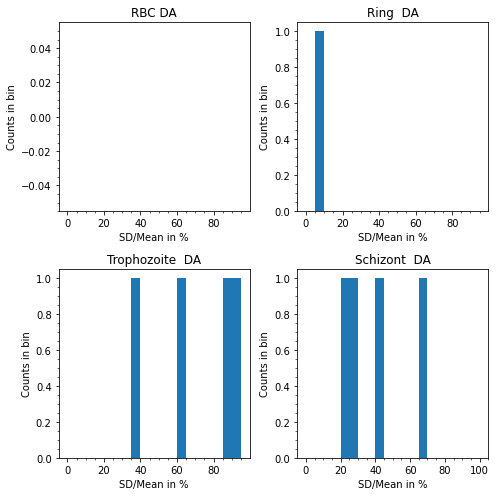

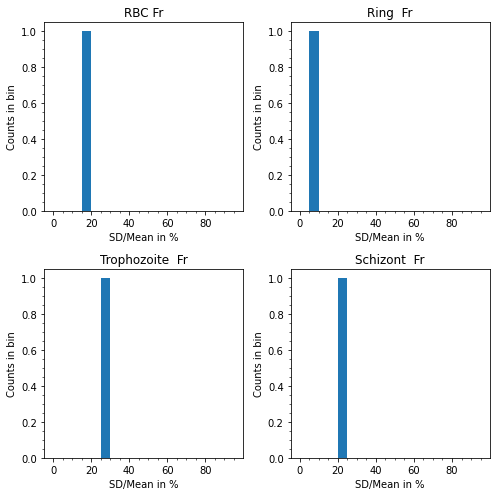

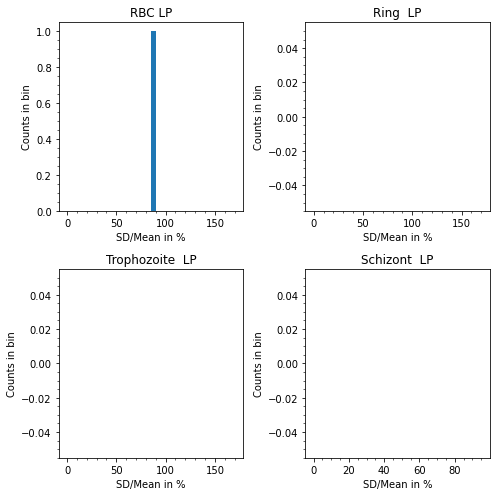

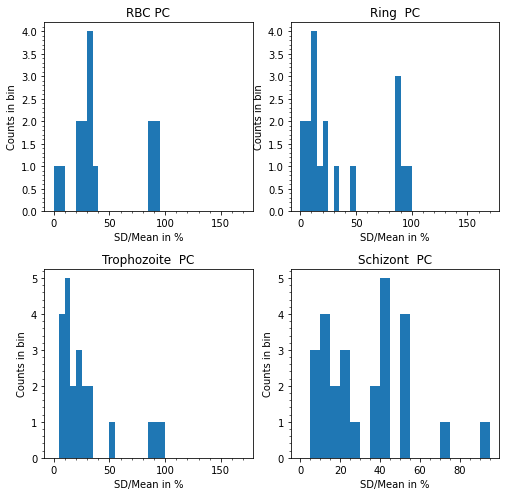

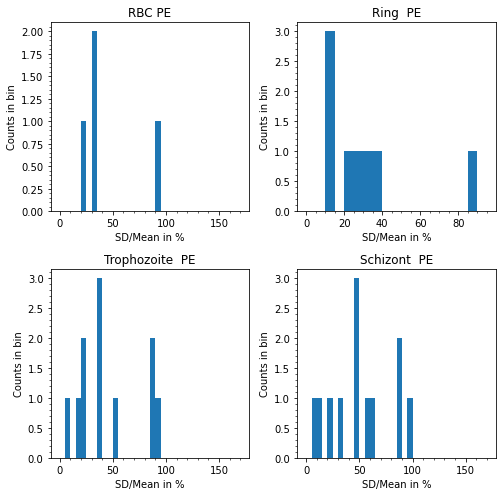

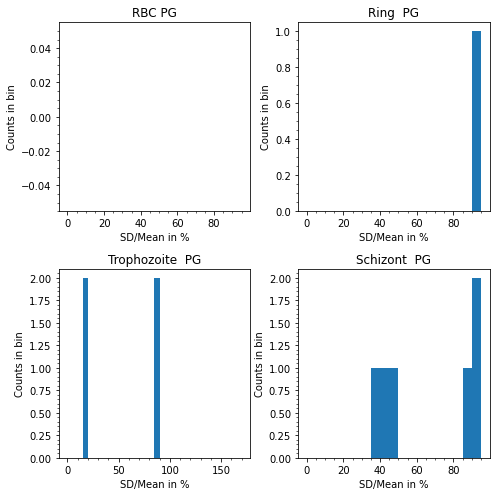

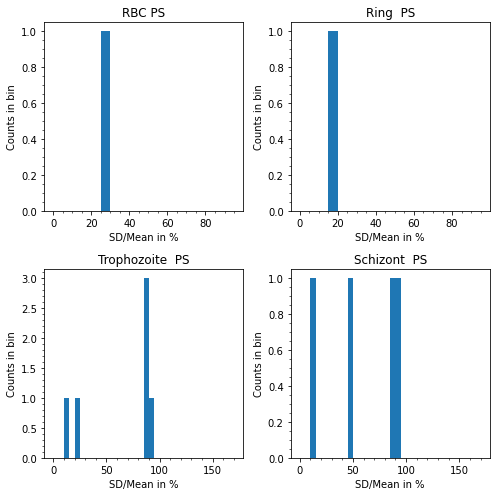

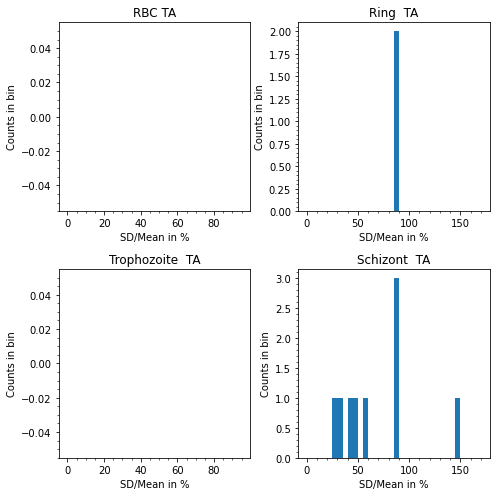

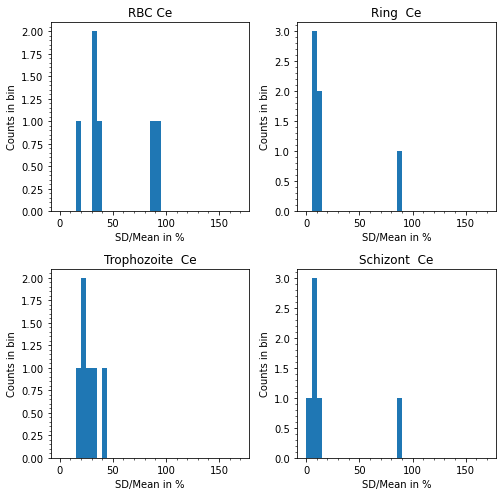

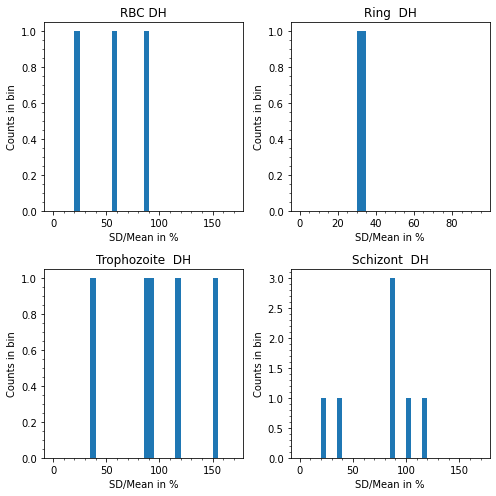

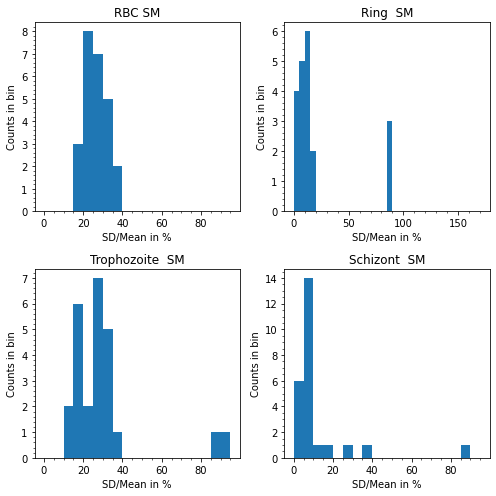

In [21]:
for step in range(len(index_classes)-1):
    if index_classes[step] == 118: 
        break
    df = df_alex.iloc[index_classes[step]:index_classes[step+1]].copy()
    # get each metabolite in class at every phase
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
    
    for i in range(4):
        phase = df.columns[i*3][:-1]
        data = df.iloc[:,i*3:i*3+3].T
        
        maxium = 100
        if maxium < max(data.std()/data.mean()*100):
            maxium = max(data.std()/data.mean()*100+5)
        bins = np.arange(0,maxium,5)
        try:
            _ = axs.flat[i].hist(data.std()/data.mean()*100, bins=bins)
            _ = axs.flat[i].set_title(phase +' '+ data.columns[0][:2])
        except:pass
        
        _ = axs.flat[i].set_xlabel('SD/Mean in %')
        _ = axs.flat[i].set_ylabel('Counts in bin')
        _ = axs.flat[i].minorticks_on()
    fig.tight_layout()

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


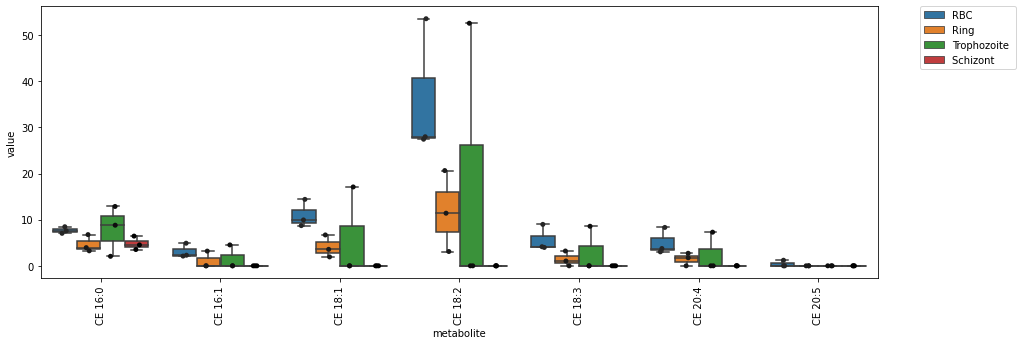

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


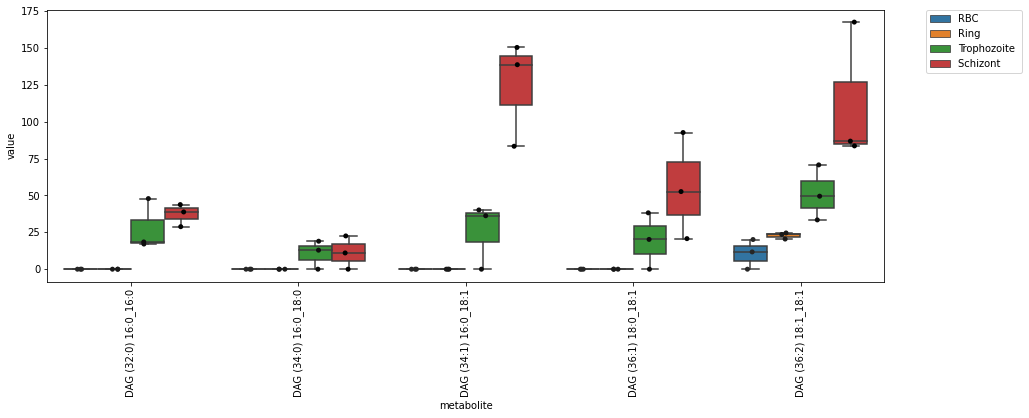

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


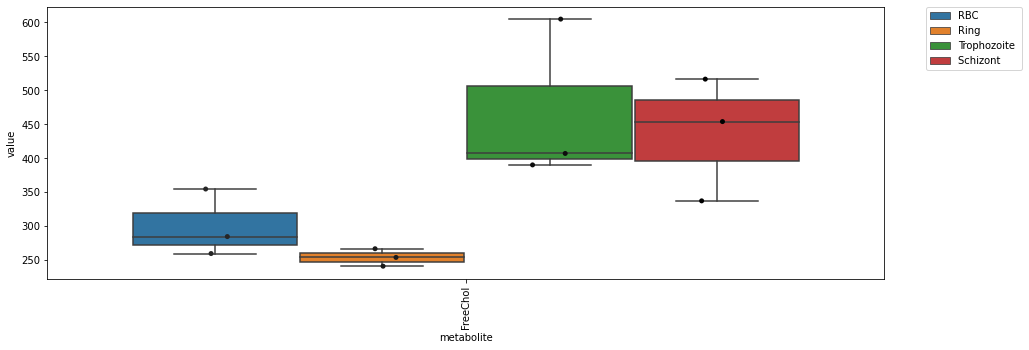

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


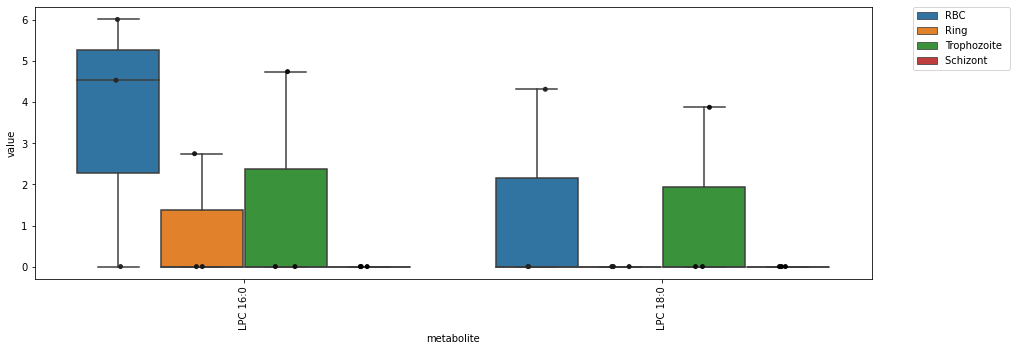

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


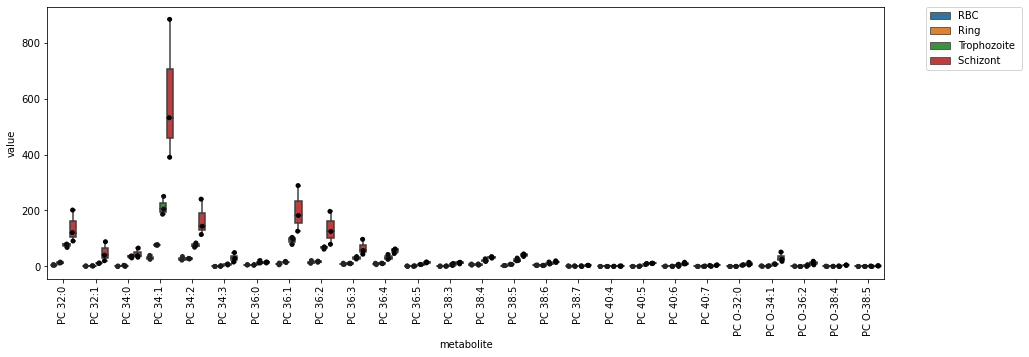

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


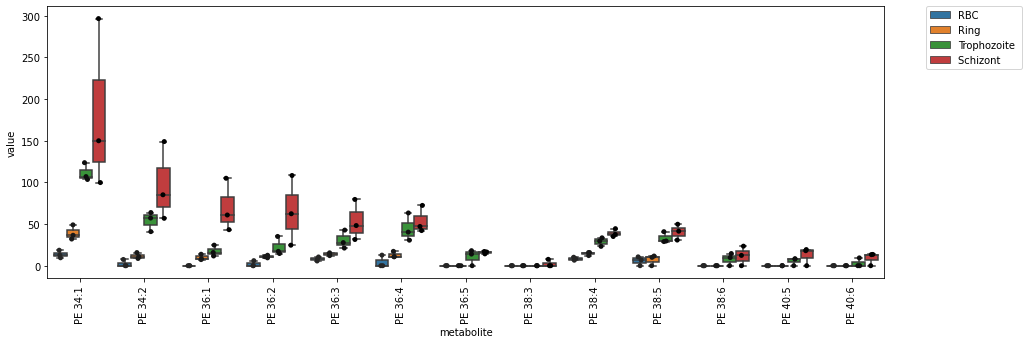

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


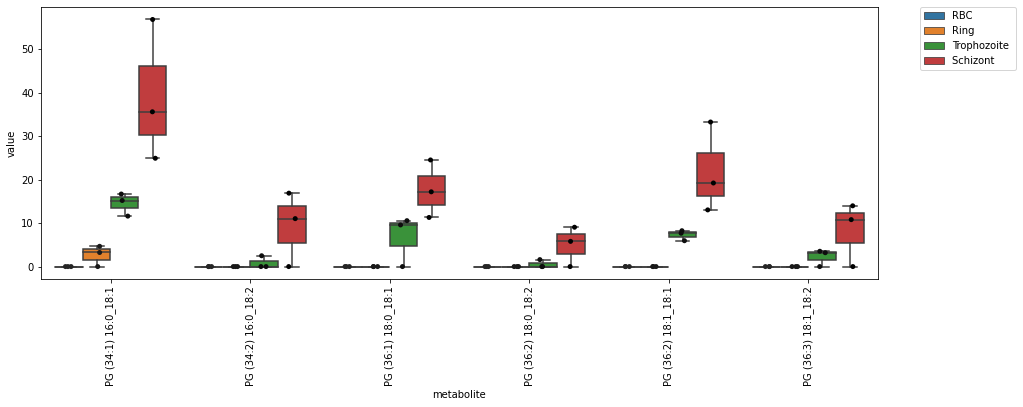

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


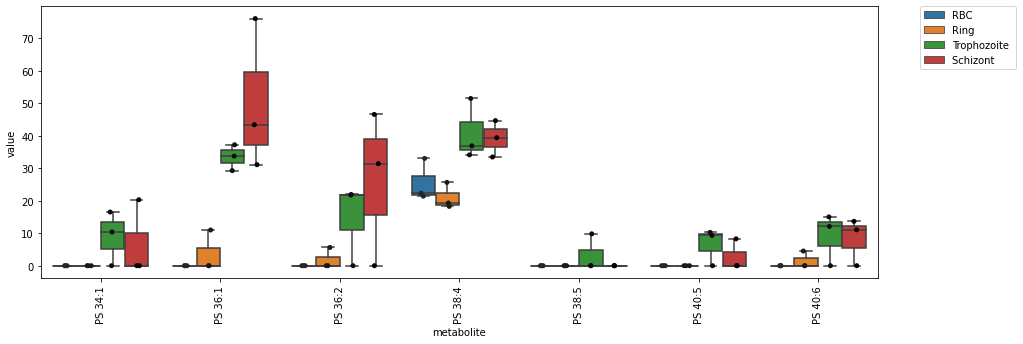

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


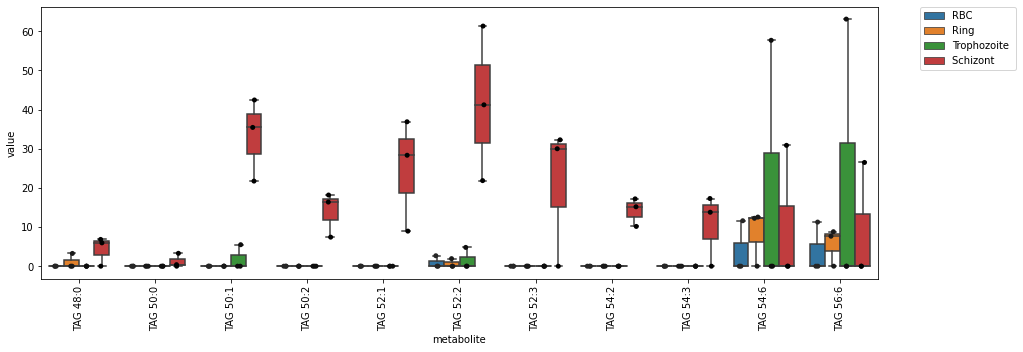

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


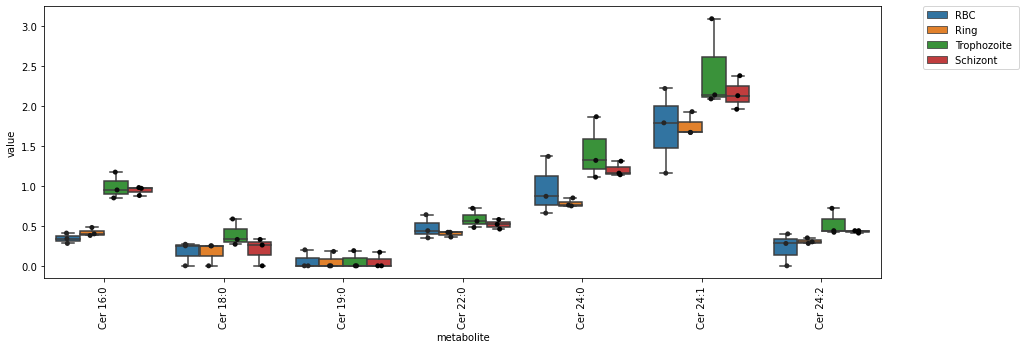

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


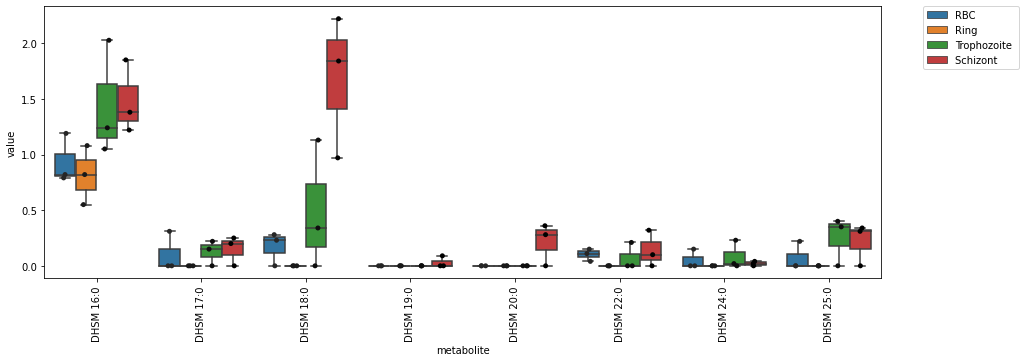

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


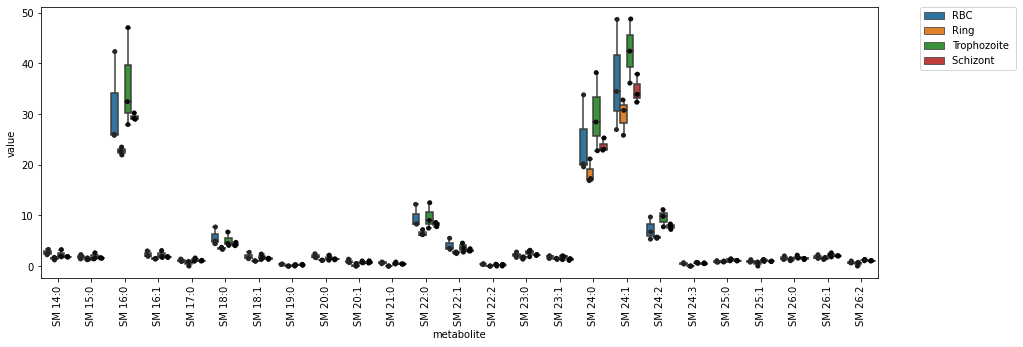

In [6]:
for step in range(len(index_classes)-1):
    if index_classes[step] == 118: 
        break
    df = df_sns.iloc[index_classes[step]:index_classes[step+1]].copy()
    
    df2 = df.stack().reset_index()
    
    df2.columns = ['metabolite', 'Phase','value']
    
    tmp = []
    fig, ax = plt.subplots(figsize=(15,5))
    for i,x in enumerate(df2.Phase):
        df2.Phase.iloc[i]=x[:-1]
        tmp.append(x[-1:])
    df2['experiment']= tmp
    
    _ = sns.boxplot(x="metabolite", y="value",
                    hue="Phase", data=df2)
   
    
    _ = sns.stripplot(x="metabolite", y="value",
                      hue="Phase", data=df2, color='black', dodge=True)
    
    handles, labels = _.get_legend_handles_labels()

    # When creating the legend, only use the first two elements
    # to effectively remove the last two.
    l = plt.legend(handles[:-4], labels[0:-4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation='vertical')
    plt.show()
    plt.close()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


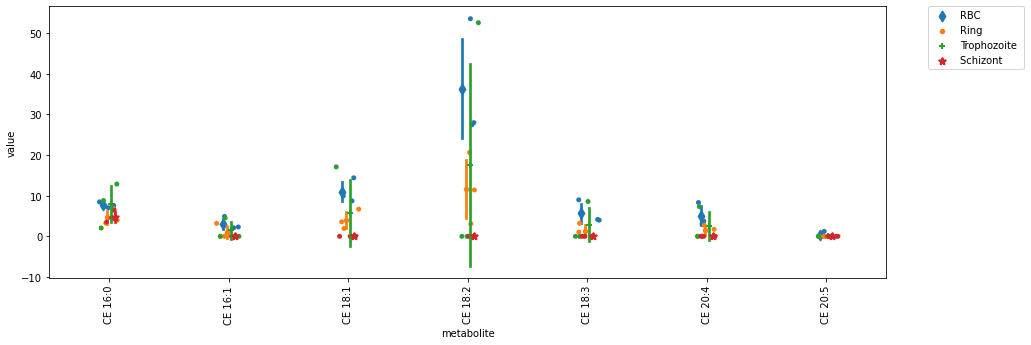

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


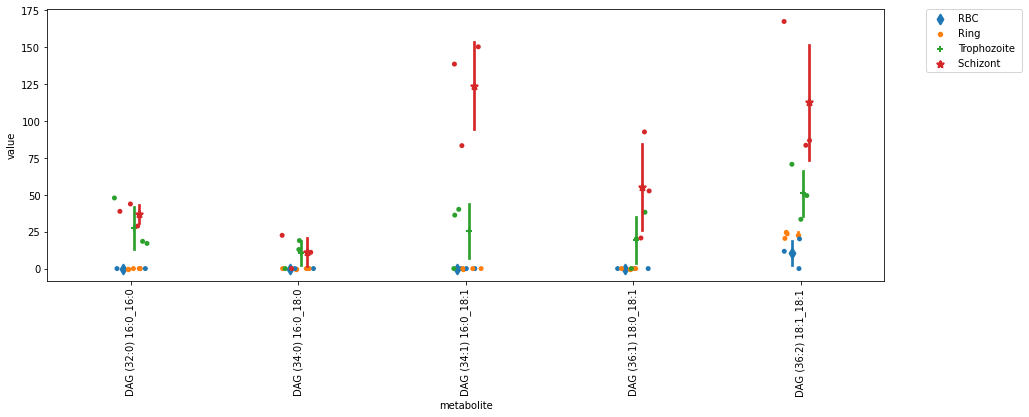

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


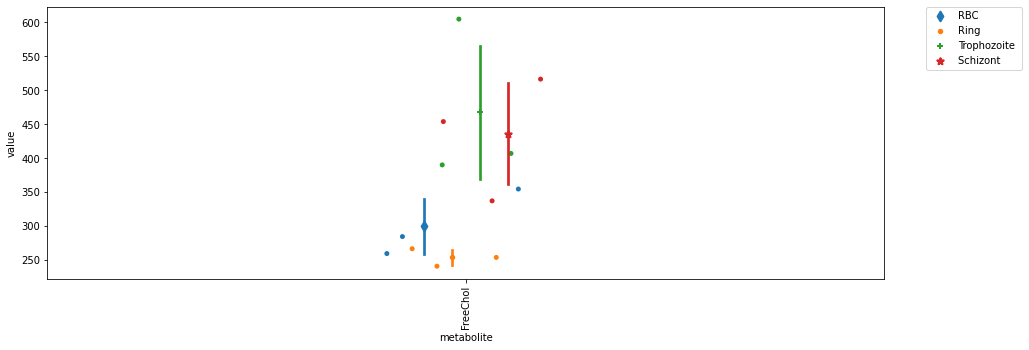

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


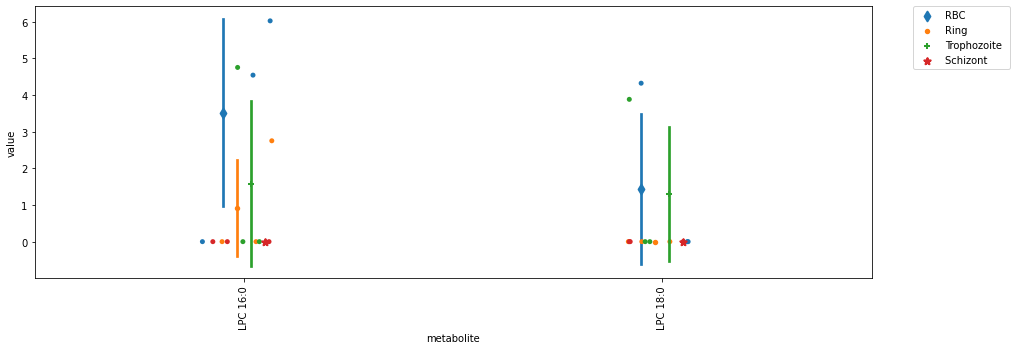

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


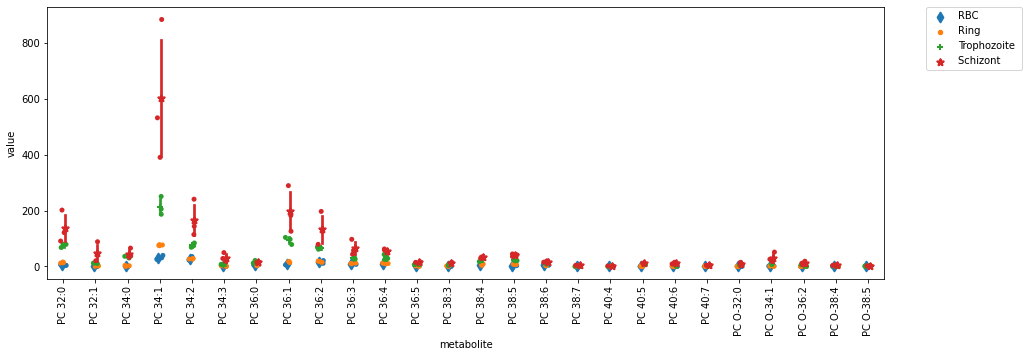

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


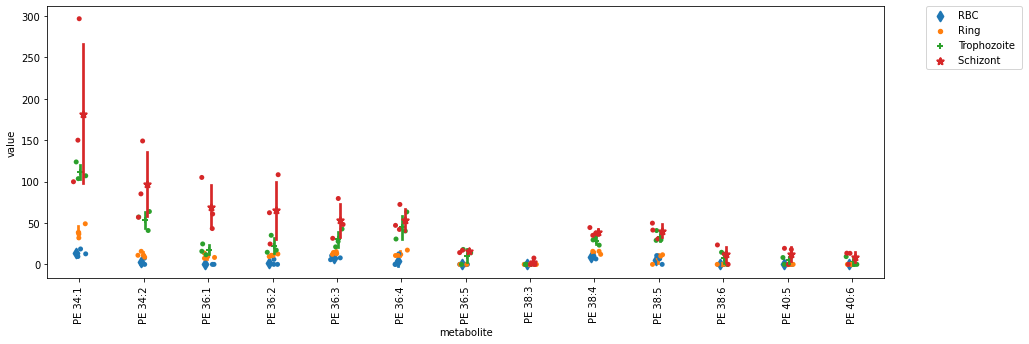

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


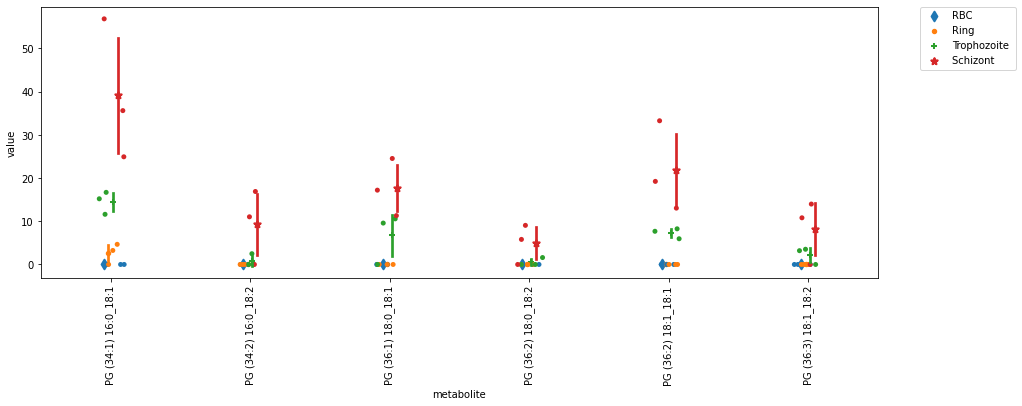

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


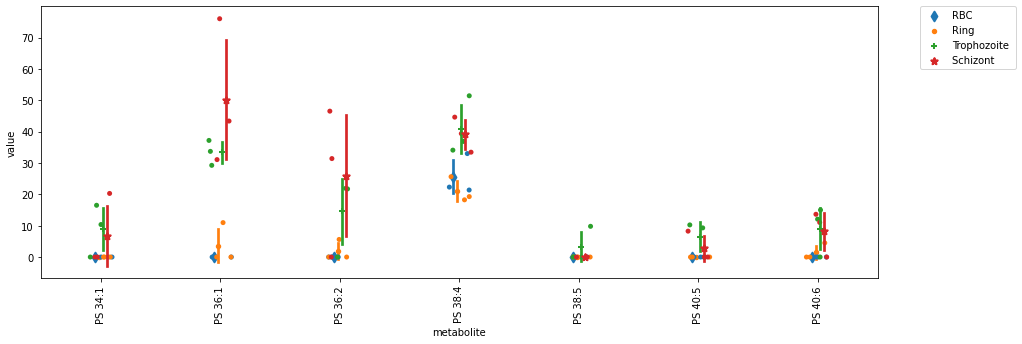

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


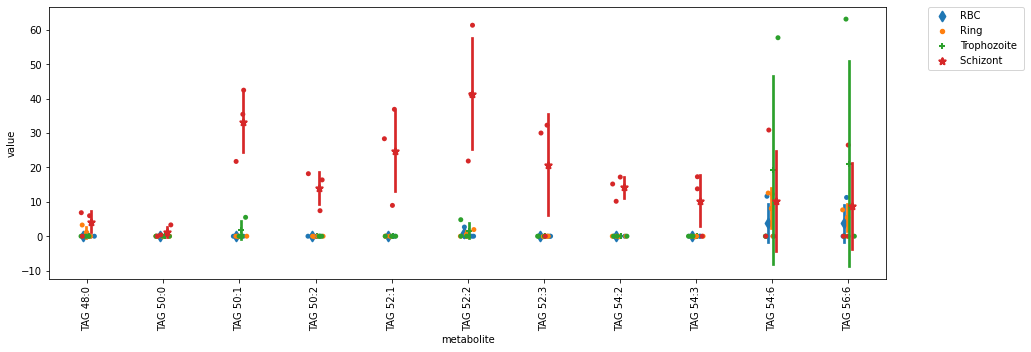

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


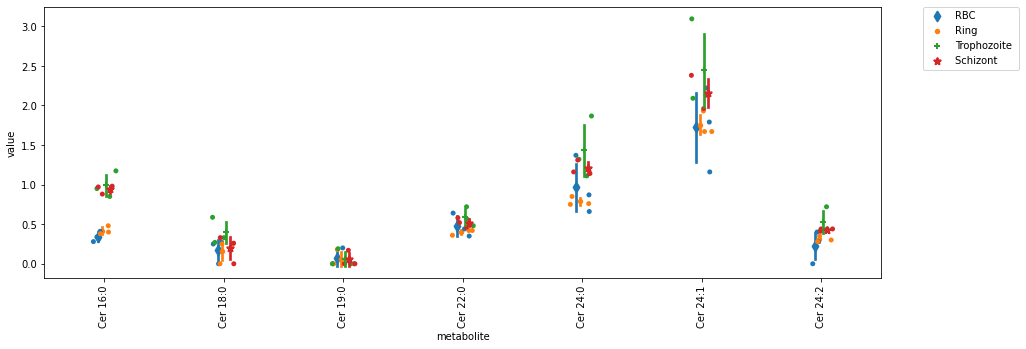

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


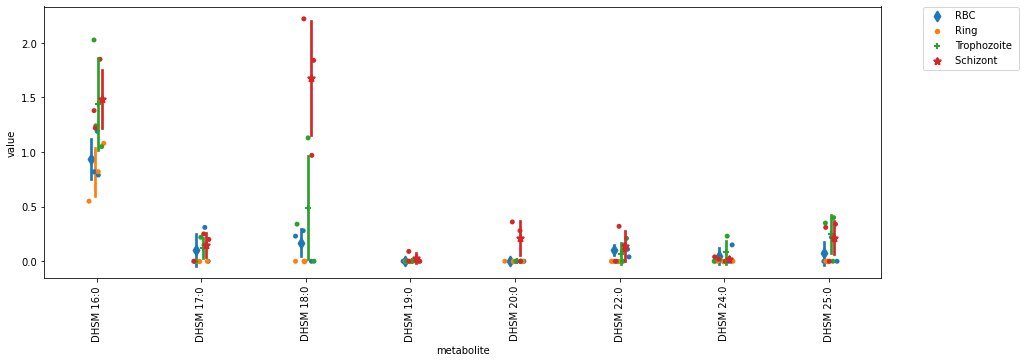

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


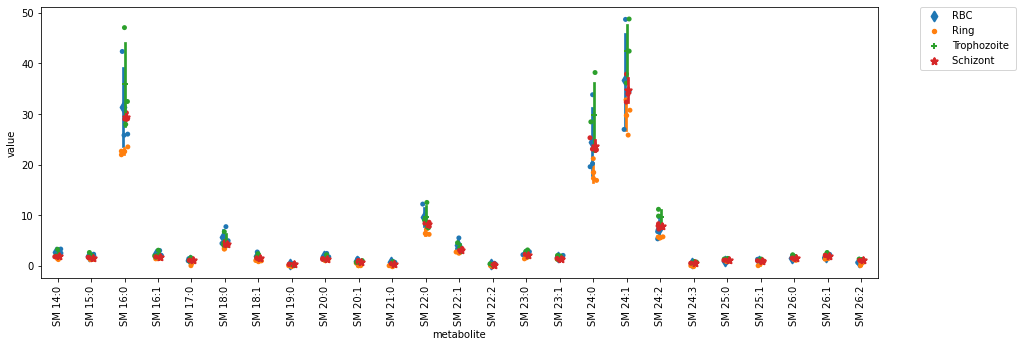

In [11]:
for step in range(len(index_classes)-1):
    if index_classes[step] == 118: 
        break
    df = df_sns.iloc[index_classes[step]:index_classes[step+1]].copy()
    
    df2 = df.stack().reset_index()
    df2.columns = ['metabolite', 'Phase','value']
    
    fig, ax = plt.subplots(figsize=(15,5))
    for i,x in enumerate(df2.Phase):
        df2.Phase.iloc[i]=x[:-1]
    
    _ = sns.pointplot(x="metabolite", y="value", hue="Phase", ci='sd',
                dodge=True, data=df2,
                linestyles=['','','',''],
               markers=['d','.','+','*'])
    _ = sns.stripplot(x="metabolite", y="value",
                      hue="Phase", data=df2)
    handles, labels = _.get_legend_handles_labels()

    # When creating the legend, only use the first two elements
    # to effectively remove the last two.
    l = plt.legend(handles[:-4], labels[0:-4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation='vertical')
    plt.show()
    plt.close()

In [22]:
df_means

Unnamed: 0,SM 14:0,SM 15:0,SM 16:0,SM 16:1,SM 17:0,SM 18:0,SM 18:1,SM 19:0,SM 20:0,SM 20:1,...,SM 24:0,SM 24:1,SM 24:2,SM 24:3,SM 25:0,SM 25:1,SM 26:0,SM 26:1,SM 26:2,Sum
RBC1,0.017917,0.011249,0.208983,0.016552,0.007231,0.039691,0.011811,0.002410,0.014061,0.006508,...,0.162140,0.276876,0.054234,0.003857,0.006267,0.006106,0.011329,0.012695,0.005223,124.460000
Ring 1,0.015395,0.015885,0.222004,0.014513,0.000000,0.032163,0.010100,0.000000,0.011375,0.000000,...,0.169445,0.301432,0.055697,0.000000,0.008041,0.000000,0.014513,0.012748,0.000000,101.980000
Trophozoite 1,0.016226,0.013034,0.234739,0.015295,0.007980,0.033515,0.011837,0.000000,0.010773,0.005054,...,0.190451,0.243250,0.055592,0.003591,0.007182,0.006517,0.010773,0.013034,0.006517,200.506667
Schizont 1,0.013843,0.012983,0.227827,0.013296,0.008212,0.032692,0.011341,0.001251,0.009698,0.004771,...,0.179024,0.253011,0.056624,0.003911,0.008369,0.007743,0.010011,0.015955,0.008525,127.860000


In [82]:
CE = df_alex.iloc[index_classes[0]:index_classes[1]]
means = CE.iloc[:,-12:]
df_means = means.iloc[:,::3].stack().reset_index()
df_means.columns = ['metabolite', 'variable','value']

tmp = means.iloc[:,1::3].stack().reset_index()
tmp.columns = ['metabolite', 'std','val']
means = df_means.join(tmp, rsuffix='_other')
means = means.drop(columns=['metabolite_other','std'])
means.columns =['metabolite','timepoint','value','std_val']
means



,metabolite,timepoint,value,std_val
0,CE 16:0,mean_RBC,7.696667,0.722103
1,CE 16:0,mean_Ring,4.650000,1.859597
2,CE 16:0,mean_Trophozoite,7.906667,5.455138
3,CE 16:0,mean_Schizont,4.833333,1.478524
4,CE 16:1,mean_RBC,3.103333,1.558856
5,CE 16:1,mean_Ring,1.063333,1.841747
6,CE 16:1,mean_Trophozoite,1.510000,2.615397
7,CE 16:1,mean_Schizont,0.000000,0.000000
8,CE 18:1,mean_RBC,11.016667,2.993899
9,CE 18:1,mean_Ring,4.063333,2.418043


In [89]:
df2 = CE.iloc[:,:-8].stack().reset_index()

df2.columns = ['metabolite', 'variable','value']
for i,x in enumerate(df2.variable):
    df2.variable.iloc[i]=x[:-1]

df2

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,metabolite,variable,value
0,CE 16:0,RBC,7.580000
1,CE 16:0,RBC,8.470000
2,CE 16:0,RBC,7.040000
3,CE 16:0,Ring,3.940000
4,CE 16:0,Ring,3.250000
5,CE 16:0,Ring,6.760000
6,CE 16:0,Trophozoite,8.800000
7,CE 16:0,Trophozoite,2.060000
8,CE 16:0,Trophozoite,12.860000
9,CE 16:0,Schizont,3.530000


/usr/lib/python3/dist-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


IndexError: list index out of range

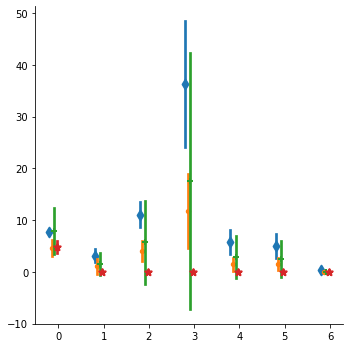

In [90]:

_ = sns.catplot(x="metabolite", y="value", hue="variable", ci='sd',
                dodge=0.4, data=df2, kind='point',
                linestyles=['','','',''],
               markers=['d','.','+','*'])


RBC


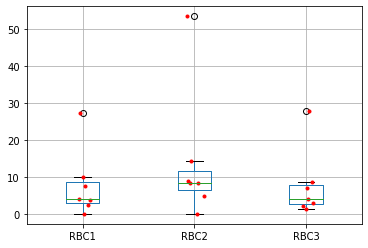

Ring 


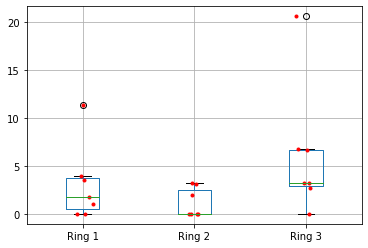

Trophozoite 


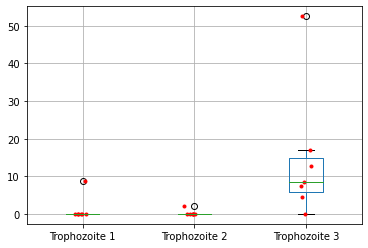

Schizont 


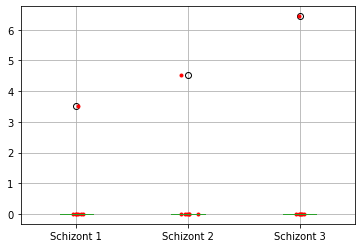

In [91]:
# get each metabolite class in every phase
for i in range(4):
    print(CE.columns[i*3][:-1])
    data = CE.iloc[:,i*3:i*3+3]
    _ = data.boxplot()
    for i,x in enumerate(data.columns):
        y = data[x]
        # Add some random "jitter" to the x-axis
        x = np.random.normal(i+1, 0.04, size=len(y))
        _ = plt.plot(x, y, 'r.', alpha=1.0)
       
    plt.show()

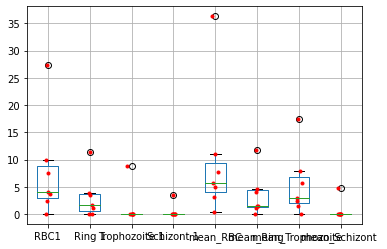

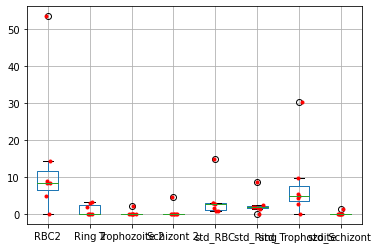

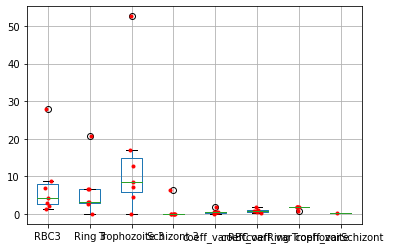

In [92]:
# to get each experiment
for i in range(3):
    data = CE.iloc[:,i::3]
    _ = data.boxplot()
    for i,x in enumerate(data.columns):
            y = data[x]
            # Add some random "jitter" to the x-axis
            x = np.random.normal(i+1, 0.04, size=len(y))
            plt.plot(x, y, 'r.', alpha=1.0)
    
    plt.show()


## SLIMEr for Alex Maier Data-set

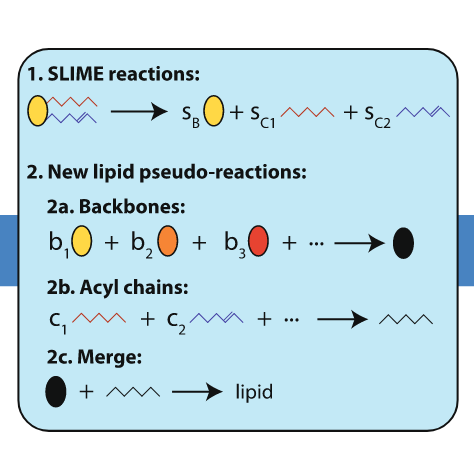

### 1. Step produce DataFrames for each **head** group and calculate its mean mass per stage, can be used for the backbone part of SLIMEr (2a) or $S_B$

In [7]:
df_alex.columns

Index(['RBC1', 'RBC2', 'RBC3', 'Ring 1', 'Ring 2', 'Ring 3', 'Trophozoite 1',
       'Trophozoite 2', 'Trophozoite 3', 'Schizont 1', 'Schizont 2',
       'Schizont 3', 'mean_RBC', 'std_RBC', 'coeff_varRBC', 'mean_Ring ',
       'std_Ring ', 'coeff_varRing ', 'mean_Trophozoite ', 'std_Trophozoite ',
       'coeff_varTrophozoite ', 'mean_Schizont ', 'std_Schizont ',
       'coeff_varSchizont '],
      dtype='object')

In [8]:
head_group_dic = {}
# Loop to go separately through all the different lipid classes
for step in range(len(index_classes)):
    if index_classes[step] == 118: 
        break
    df = df_alex.iloc[index_classes[step]:index_classes[step+1]].copy()
    
    analysis_df_part = df.iloc[:,-12:]
    df_means = analysis_df_part.iloc[:,::3].T
    col_sum = df_means.sum(axis=1)
    head_group_dic[head_group_nme[step]]=col_sum

    df_means = df_means.apply(lambda x: x/col_sum)
    df_means['Sum']= col_sum
    print(df_means)

Unnamed: 0          CE 16:0   CE 16:1   CE 18:1   CE 18:2   CE 18:3   CE 20:4  \
mean_RBC           0.111116  0.044803  0.159047  0.524254  0.082291  0.072666   
mean_Ring          0.190626  0.043591  0.166576  0.480186  0.058076  0.060946   
mean_Trophozoite   0.208509  0.039821  0.150229  0.462025  0.075334  0.064082   
mean_Schizont      1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Unnamed: 0          CE 20:5        Sum  
mean_RBC           0.005823  69.266667  
mean_Ring          0.000000  24.393333  
mean_Trophozoite   0.000000  37.920000  
mean_Schizont      0.000000   4.833333  
Unnamed: 0         DAG (32:0) 16:0_16:0  DAG (34:0) 16:0_18:0  \
mean_RBC                       0.000000              0.000000   
mean_Ring                      0.000000              0.000000   
mean_Trophozoite               0.206558              0.078945   
mean_Schizont                  0.109113              0.032869   

Unnamed: 0         DAG (34:1) 16:0_18:1  DAG (36:1) 18:0_18:1  

In [11]:
# Produce strings with the correct stoichiometric values for each head group lipid in the data set
ring_str = ''
troph_str = '' 
schizont_str = ''  
for head_group in head_group_dic:
    addition = ' + '
    if head_group == 'SM':
        addition = ''
    ring_str+=str(head_group_dic[head_group][1].round(3))+head_group+addition
    troph_str+=str(head_group_dic[head_group][2].round(3))+head_group+addition
    schizont_str+=str(head_group_dic[head_group][3].round(3))+head_group+addition


ring_str

'24.393CE + 22.85DAG + 253.59FreeChol + 0.917LPC + 208.437PC + 120.31PE + 2.633PG + 28.087PS + 15.483TAG + 3.9Cer + 0.817DHSM + 104.193SM'

In [13]:
df_absolut = df_alex.iloc[:118].copy()

# Define the pattern to match similar numbers at the end of the string
pattern = r'\d+:\d+$'

# Use str.contains() with the pattern to filter the column
mask = df_absolut.index.str.contains("16")
filtered_values = df_absolut[mask]

# Display the filtered values
print(filtered_values)

                       RBC1   RBC2   RBC3  Ring 1  Ring 2  Ring 3  \
Unnamed: 0                                                          
CE 16:0                7.58   8.47   7.04    3.94    3.25    6.76   
CE 16:1                2.30   4.90   2.11    0.00    0.00    3.19   
DAG (32:0) 16:0_16:0   0.00   0.00   0.00    0.00    0.00    0.00   
DAG (34:0) 16:0_18:0   0.00   0.00   0.00    0.00    0.00    0.00   
DAG (34:1) 16:0_18:1   0.00   0.00   0.00    0.00    0.00    0.00   
LPC 16:0               0.00   6.02   4.54    2.75    0.00    0.00   
PG (34:1) 16:0_18:1    0.00   0.00   0.00    4.66    3.24    0.00   
PG (34:2) 16:0_18:2    0.00   0.00   0.00    0.00    0.00    0.00   
Cer 16:0               0.28   0.34   0.41    0.40    0.38    0.48   
DHSM 16:0              0.82   0.79   1.19    1.08    0.82    0.55   
SM 16:0               26.01  25.79  42.35   22.64   23.49   21.93   
SM 16:1                2.06   1.91   3.00    1.48    1.52    1.36   

                      Trophozoite

In [14]:
side_chain_dic = {}
df_absolut = df_alex.iloc[:118].copy()

# Extract the last n characters from each string value
n = 4
last_n_Chars = df_absolut.index.str[-n:]
last_n_Chars = last_n_Chars.str.replace(':','.')

unique_nums = pd.to_numeric(last_n_Chars, errors='coerce').unique()
unique_str = unique_nums.astype('str')
unique_str = unique_str.str.replace('.', ':')

for pattern in unique_str:
    # Use str.contains() with the pattern to filter index
    mask = df_absolut.index.str.contains(pattern)
    filtered_values = df_absolut[mask]

    # Get part of the dataframe with mean values
    analysis_df_part = filtered_values.iloc[:,-12:]
    df_means = analysis_df_part.iloc[:,::3].T
    # Calculate sum of means of specific lipid for each stage 
    col_sum = df_means.sum(axis=1)
    # Calculate distribution of each lipids subspecies
    #df_means = df_means.apply(lambda x: x/col_sum)
    # Display pattern and corresponding filtered values
    side_chain_dic[pattern]=col_sum
    print(pattern)
    print(col_sum)
    print(df_means.T)

16:0
mean_RBC              43.876667
mean_Ring             32.123333
mean_Trophozoite     126.957778
mean_Schizont        257.596667
dtype: float64
                       mean_RBC  mean_Ring   mean_Trophozoite   mean_Schizont 
Unnamed: 0                                                                    
CE 16:0                7.696667    4.650000           7.906667        4.833333
DAG (32:0) 16:0_16:0   0.000000    0.000000          27.795556       37.146667
DAG (34:0) 16:0_18:0   0.000000    0.000000          10.623333       11.190000
DAG (34:1) 16:0_18:1   0.000000    0.000000          25.466667      124.120000
LPC 16:0               3.520000    0.916667           1.583333        0.000000
PG (34:1) 16:0_18:1    0.000000    2.633333          14.500000       39.126667
PG (34:2) 16:0_18:2    0.000000    0.000000           0.830000        9.306667
Cer 16:0               0.343333    0.420000           0.991111        0.943333
DHSM 16:0              0.933333    0.816667           1.438889

/tmp/ipykernel_2252999/2207629702.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  unique_str = unique_str.str.replace('.', ':')


In [17]:
# Produce strings with the correct stoichiometric values for each head group lipid in the data set
ring_str = ''
troph_str = '' 
schizont_str = ''  
for side_chain in side_chain_dic:
    addition = ' + '
    if side_chain == '26:2':
        addition = ''
    ring_str+=str(side_chain_dic[side_chain][1].round(3))+' '+side_chain+addition
    troph_str+=str(side_chain_dic[side_chain][2].round(3))+' '+side_chain+addition
    schizont_str+=str(side_chain_dic[side_chain][3].round(3))+' '+side_chain+addition
ring_str

'32.123 16:0 + 2.517 16:1 + 30.553 18:1 + 11.713 18:2 + 1.417 18:3 + 1.487 20:4 + 0.0 20:5 + 3.683 18:0 + 0.0 nan + 13.837 32:0 + 2.0 32:1 + 2.207 34:0 + 119.857 34:1 + 39.587 34:2 + 1.457 34:3 + 5.293 36:0 + 29.747 36:1 + 52.71 36:2 + 24.627 36:3 + 23.633 36:4 + 1.313 36:5 + 1.227 38:3 + 42.357 38:4 + 14.607 38:5 + 3.567 38:6 + 1.123 38:7 + 0.0 40:4 + 0.643 40:5 + 1.92 40:6 + 0.607 40:7 + 1.087 48:0 + 0.0 50:0 + 0.0 50:1 + 0.0 50:2 + 0.0 52:1 + 0.643 52:2 + 0.0 52:3 + 0.0 54:2 + 0.0 54:3 + 8.263 54:6 + 5.49 56:6 + 0.06 19:0 + 6.94 22:0 + 19.223 24:0 + 31.54 24:1 + 5.93 24:2 + 0.57 17:0 + 1.15 20:0 + 0.89 25:0 + 1.497 14:0 + 1.397 15:0 + 0.173 20:1 + 0.0 21:0 + 2.653 22:1 + 0.0 22:2 + 1.64 23:0 + 1.423 23:1 + 0.0 24:3 + 0.513 25:1 + 1.28 26:0 + 1.51 26:1 + 0.453 26:2'

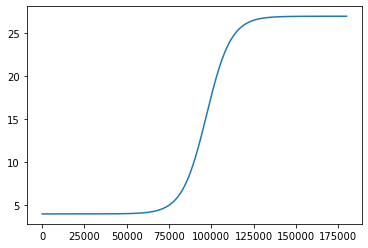

In [43]:
Vmax = 27
Vmin = 4
t12 = 97200
s = 7200
t = np.arange(0,180000,10)
cytoplasm = ((Vmax-Vmin)*1/(1+np.exp((t12-t)/s))+Vmin)
plt.plot(t, cytoplasm)